1) Data Understanding
    Scenario:
        una società immobiliare vuole ottenere una procedura automatizzata per classificare il valore di una casa.
        Non siamo interessati a nella predizione del valore effettivo (continuo) della casa, ma nell'assegnarle una label;
        La label può assumere tre valori:
            - LOW, se il valore della casa è minore o uguale a 150.000€ (val <= 150.000)
            - MEDIUM, se il valore della casa è compreso tra 150.000 e 300.000€ (150.000 < val < 300.000)
            - HIGH, se il valore della casa è maggiore o uguale a 300.000€ (val >= 300.000)

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [169]:
plt.style.use('ggplot')
data_set = pd.read_csv('train.csv', low_memory=False)

Il dataset comprende 1460 record (o istanze) e 81 attributi di cui un ID (eliminabile)

In [170]:
data_set.shape

(1460, 81)

In [171]:
data_set.size # 1460 x 81

118260

In [172]:
attributes = data_set.columns.tolist()
attributes

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [173]:
data_set.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0   1          60       RL         65.0     8450   Pave   NaN      Reg  \
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold   
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2  \
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [174]:
data_set.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg  \
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0  \
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

Il dataset presenta una serie di dati mancanti, non tutti però sono da considerare tali, infatti, alcuni attributi utilizzano il valore nullo come una vera e propria label, come nel caso dell'attributo Alley, per esempio, dove il valore Nan significa assenza dell'alley in se.

Al contrario con attributi come LotFrontage, presentano sia valori continui sia valori nulli.
consideriamo i valori NA come la media.


In [175]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Come prima cosa, ancora prima di assegnare una label più significativa ai valori nulli, rimuovo la colonna 'Id' in quanto rappresenta una semplice identificatore del record, quindi poco rilevante; e aggiungo una nuova colonna che chiameremo 'Target' che conterrà la label [LOW, MEDIUM, HIGH]

In [176]:
bins = [0, 150000, 300000, 1000000]
labels = ['LOW', 'MEDIUM', 'HIGH']
data_set.drop('Id', axis=1, inplace=True)
data_set['Target'] = pd.cut(data_set['SalePrice'], bins=bins, labels=labels)
data_set['Target'].astype('category')

0       MEDIUM
1       MEDIUM
2       MEDIUM
3          LOW
4       MEDIUM
         ...  
1455    MEDIUM
1456    MEDIUM
1457    MEDIUM
1458       LOW
1459       LOW
Name: Target, Length: 1460, dtype: category
Categories (3, object): ['LOW' < 'MEDIUM' < 'HIGH']

In [177]:
data_set.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0          60       RL         65.0     8450   Pave   NaN      Reg  \
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolQC Fence MiscFeature MiscVal   
0         Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0  \
1         Lvl    AllPub       FR2  ...    NaN   NaN         NaN       0   
2         Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0   
3         Lvl    AllPub    Corner  ...    NaN   NaN         NaN       0   
4         Lvl    AllPub       FR2  ...    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  Target  
0      2   2008        WD         Normal     208500  MEDIUM  
1      5   2007        WD         Normal     181500  MEDIUM  
2      9   2008        WD         Normal     223500  MEDIUM  
3      2   2006        WD        Abnorml     140000     LOW  
4     12   2008        WD         Normal     250000  MEDIUM  

[5 rows x 81 columns]

In questo snippet sostituisco la maggior parte dei valori NA o None con delle label più significative
Rimangono una serie di valori nulli come nel caso di MasVnrType dove i valori None rappresentano l'assenza del rivestimento mentre
i valori sono NA quando non sono stati specificati.

- GarageYrBlt presenta 81 valori nulli, attributo categorico (anno in cui è stato costruito)
- Electrical presenta 1 valore nullo, potremmo rimuovere il record
- MasVnrType presenta 872 valori nulli, attributo categorico (potremmo sostituire i valori mancanti con la classe di maggioranza)
- MasVnrArea presenta 8 valori nulli, attributo numerico continuo (potremmo sostituire i valori mancanti con zero)
- LotFrontage presenta 259 valori nulli attributo numerico continuo. ?????


In [178]:
data_set['Alley'].fillna('NO_ACCESS', inplace=True)
data_set['MasVnrType'].replace('None', 'NO_COATING', inplace=True) # still presents NA values
data_set['BsmtQual'].fillna('NO_BASEMENT', inplace=True)
data_set['BsmtCond'].fillna('NO_BASEMENT', inplace=True)
data_set['BsmtExposure'].fillna('NO_BASEMENT', inplace=True)
data_set['BsmtFinType1'].fillna('NO_BASEMENT', inplace=True)
data_set['BsmtFinType2'].fillna('NO_BASEMENT', inplace=True)
data_set['FireplaceQu'].fillna('NO_FIREPLACE', inplace=True)
data_set['GarageType'].fillna('NO_GARAGE', inplace=True)
data_set['GarageFinish'].fillna('NO_GARAGE', inplace=True)
data_set['GarageQual'].fillna('NO_GARAGE', inplace=True)
data_set['GarageCond'].fillna('NO_GARAGE', inplace=True)
data_set['PoolQC'].fillna('NO_POOL', inplace=True)
data_set['Fence'].fillna('NO_FENCE', inplace=True)
data_set['MiscFeature'].fillna('None', inplace=True)
data_set.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Target             0
Length: 81, dtype: int64

In [179]:
#Sostituisco i valori NA con la classi di maggioranza per MasVnrType
MasVnrType_majority_class = data_set['MasVnrType'].value_counts().idxmax()
data_set['MasVnrType'].fillna(MasVnrType_majority_class, inplace=True)

#Sostituisco i valori NA con la media per MasVnrArea, per rimanere in linea con la modifica precedente
data_set['MasVnrArea'].fillna(data_set['MasVnrArea'].mean(), inplace=True)

#Sostituisco il valore dell'unico record che contiene il valore nullo con la classe di maggioranza
Electrical_majority_class = data_set['Electrical'].value_counts().idxmax()
data_set['Electrical'].fillna(Electrical_majority_class, inplace=True)

#Sostituisco i valori NA con la classi di maggioranza per GarageYrBlt
GarageYrBlt_majority_class = data_set['GarageYrBlt'].value_counts().idxmax()
data_set['GarageYrBlt'].fillna(GarageYrBlt_majority_class, inplace=True)

#Sostituisco i valori NA con la media per LotFrontage
data_set['LotFrontage'].fillna(0.0, inplace=True)  # data_set['LotFrontage'].mean() or 0.0 or delete

In [180]:
data_set.describe().T

count           mean           std      min        25%   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00  \
LotFrontage    1460.0      70.049958     22.024023     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0     103.685262    180.569112      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1460.0    1979.976027     24.749688   1900.0    1962.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                         50%        75%       max  
MSSubClass         50.000000      70.00     190.0  
LotFrontage        70.049958      79.00     313.0  
LotArea          9478.500000   11601.50  215245.0  
OverallQual         6.000000       7.00      10.0  
OverallCond         5.000000       6.00       9.0  
YearBuilt        1973.000000    2000.00    2010.0  
YearRemodAdd     1994.000000    2004.00    2010.0  
MasVnrArea          0.000000     164.25    1600.0  
BsmtFinSF1        383.500000     712.25    5644.0  
BsmtFinSF2          0.000000       0.00    1474.0  
BsmtUnfSF         477.500000     808.00    2336.0  
TotalBsmtSF       991.500000    1298.25    6110.0  
1stFlrSF         1087.000000    1391.25    4692.0  
2ndFlrSF            0.000000     728.00    2065.0  
LowQualFinSF        0.000000       0.00     572.0  
GrLivArea        1464.000000    1776.75    5642.0  
BsmtFullBath        0.000000       1.00       3.0  
BsmtHalfBath        0.000000       0.00       2.0  
FullBath            2.000000       2.00       3.0  
HalfBath            0.000000       1.00       2.0  
BedroomAbvGr        3.000000       3.00       8.0  
KitchenAbvGr        1.000000       1.00       3.0  
TotRmsA

In [181]:
data_set.describe(include='object').T

count unique           top  freq
MSZoning       1460      5            RL  1151
Street         1460      2          Pave  1454
Alley          1460      3     NO_ACCESS  1369
LotShape       1460      4           Reg   925
LandContour    1460      4           Lvl  1311
Utilities      1460      2        AllPub  1459
LotConfig      1460      5        Inside  1052
LandSlope      1460      3           Gtl  1382
Neighborhood   1460     25         NAmes   225
Condition1     1460      9          Norm  1260
Condition2     1460      8          Norm  1445
BldgType       1460      5          1Fam  1220
HouseStyle     1460      8        1Story   726
RoofStyle      1460      6         Gable  1141
RoofMatl       1460      8       CompShg  1434
Exterior1st    1460     15       VinylSd   515
Exterior2nd    1460     16       VinylSd   504
MasVnrType     1460      3       BrkFace  1317
ExterQual      1460      4            TA   906
ExterCond      1460      5            TA  1282
Foundation     1460      6         PConc   647
BsmtQual       1460      5            TA   649
BsmtCond       1460      5            TA  1311
BsmtExposure   1460      5            No   953
BsmtFinType1   1460      7           Unf   430
BsmtFinType2   1460      7           Unf  1256
Heating        1460      6          GasA  1428
HeatingQC      1460      5            Ex   741
CentralAir     1460      2             Y  1365
Electrical     1460      5         SBrkr  1335
KitchenQual    1460      4            TA   735
Functional     1460      7           Typ  1360
FireplaceQu    1460      6  NO_FIREPLACE   690
GarageType     1460      7        Attchd   870
GarageFinish   1460      4           Unf   605
GarageQual     1460      6            TA  1311
GarageCond     1460      6            TA  1326
PavedDrive     1460      3             Y  1340
PoolQC         1460      4       NO_POOL  1453
Fence          1460      5      NO_FENCE  1179
MiscFeature    1460      5          None  1406
SaleType       1460      9            WD  1267
SaleCondition  1460      6        Normal  1198

Le target label sono così distribuite all'interno del data_set

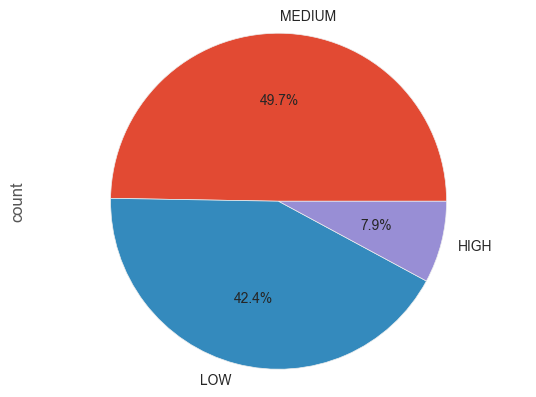

In [182]:
data_set['Target'].value_counts().plot(kind='pie', autopct='%1.1f%%')
# Show the plot
plt.axis('equal')  # This ensures that the pie is drawn as a circle
plt.show()

Sostituisco il tipo degli attributi da object a category,
Esistono altri attributi che contengono un valore numerico e quindi sono erroneamente interpretati come numerici; come MSSubClass.
YrBuilt
YrRemodAdd

In [183]:
for attribute in data_set.columns:
    if data_set[attribute].dtype == object:
        data_set[attribute] = data_set[attribute].astype('category')
data_set['YrSold'] = data_set['YrSold'].astype('category')
data_set['MoSold'] = data_set['MoSold'].astype('category')
data_set['MSSubClass'] = data_set['MSSubClass'].astype('category')
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

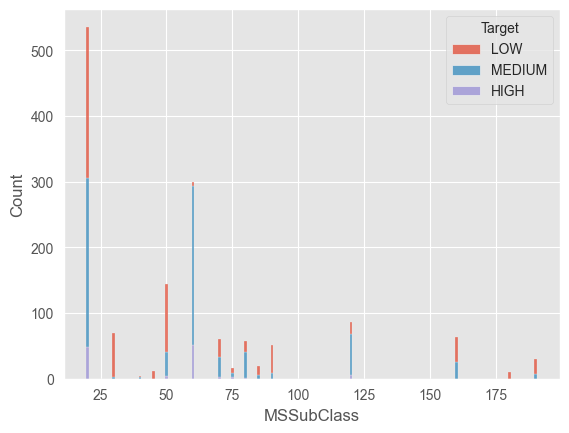

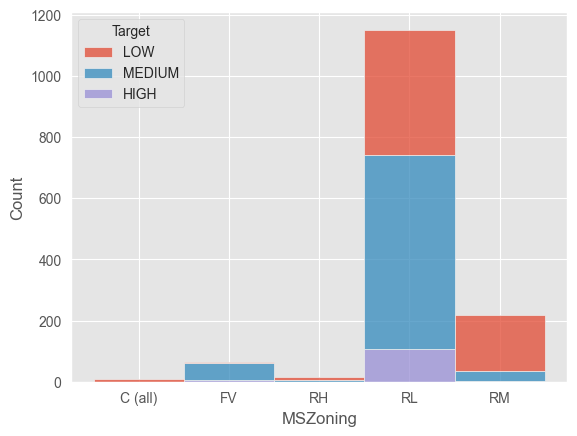

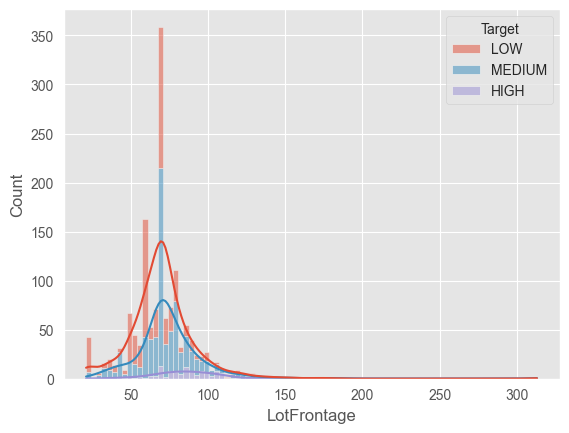

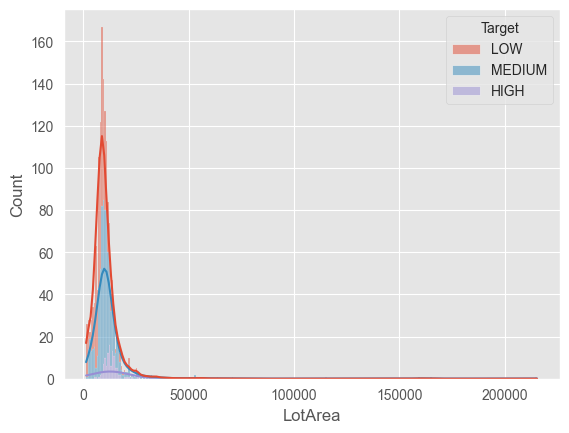

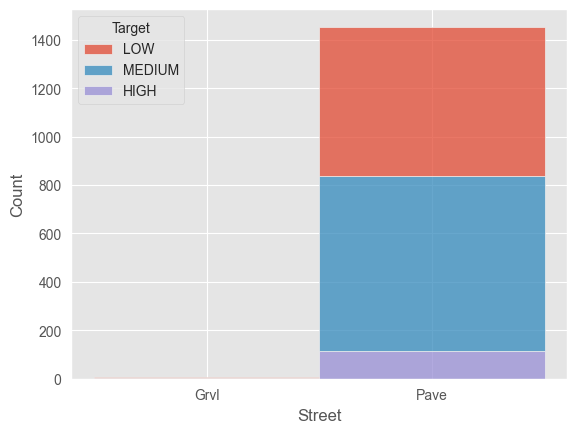

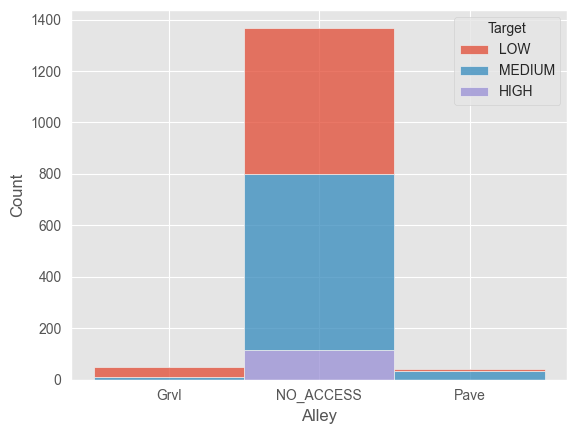

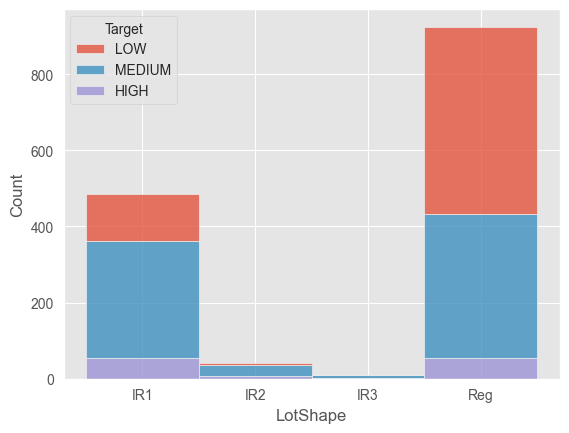

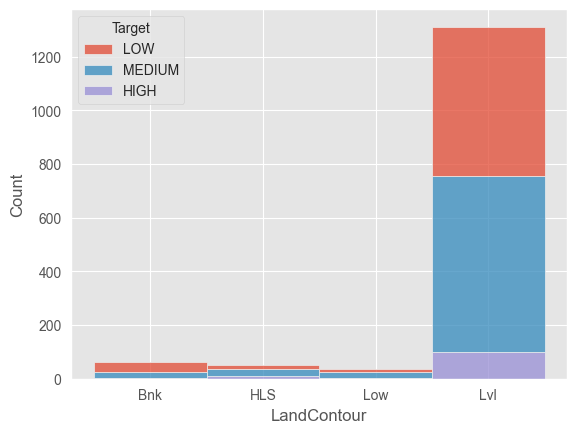

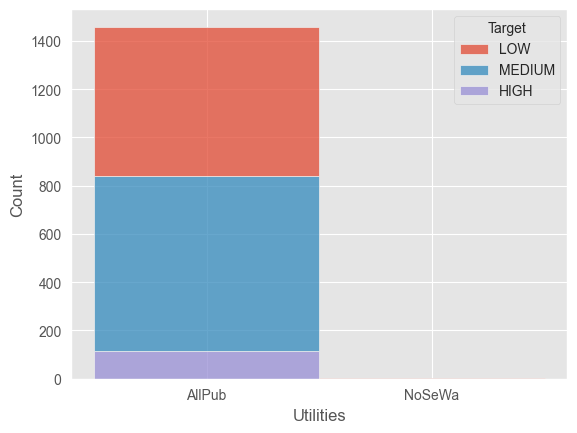

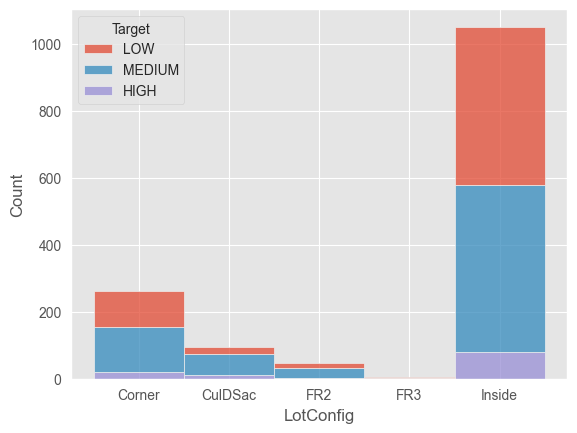

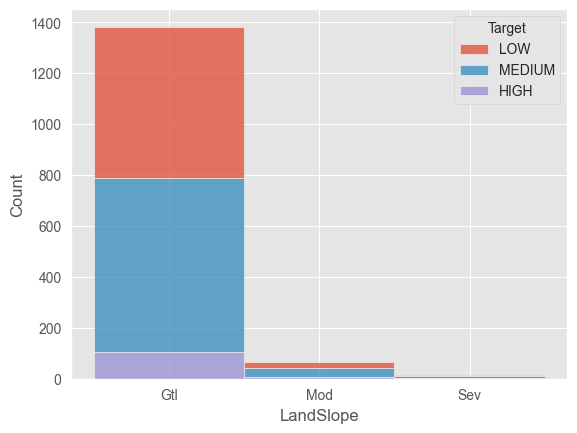

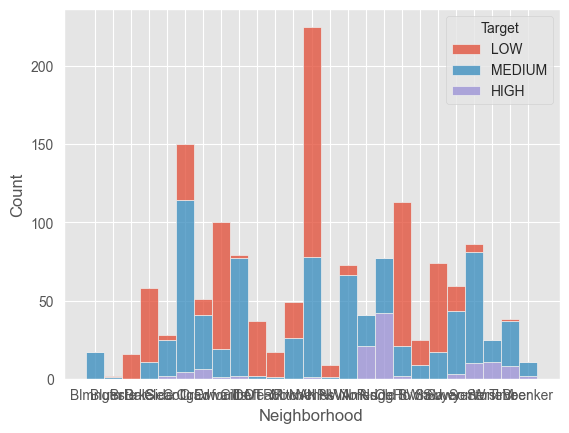

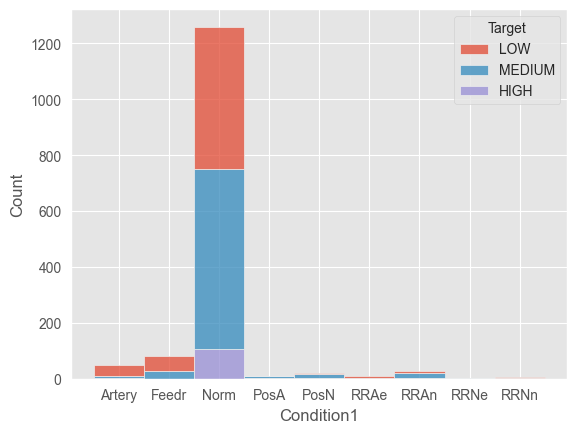

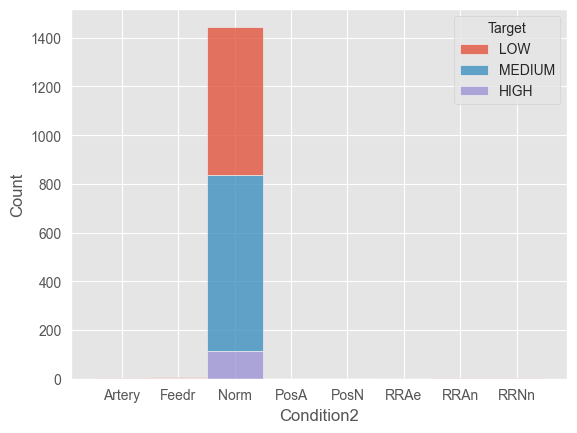

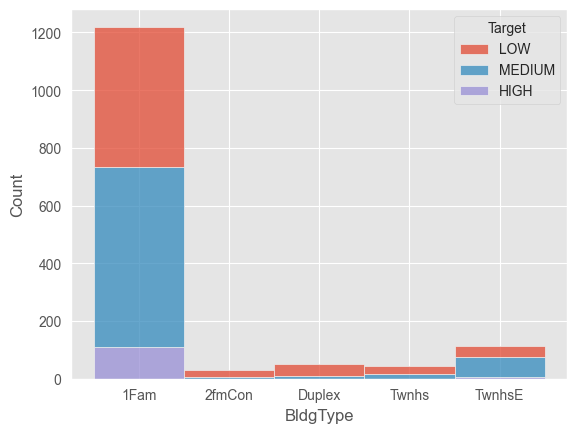

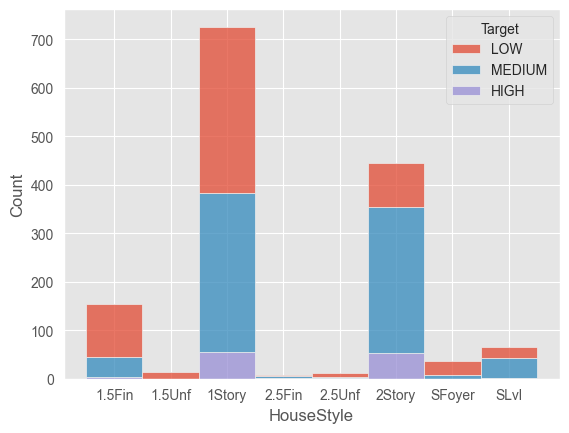

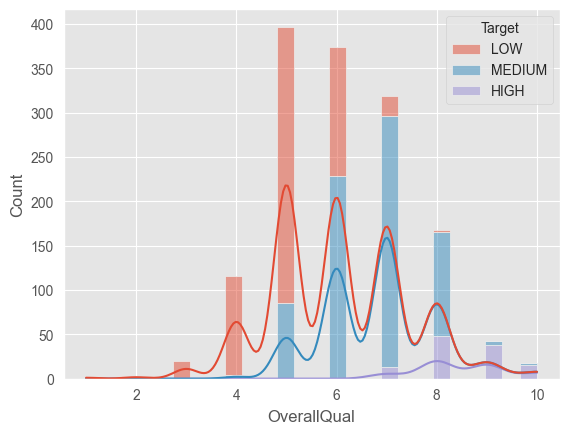

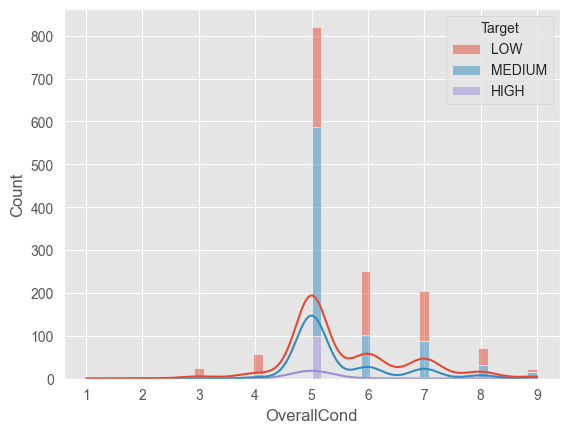

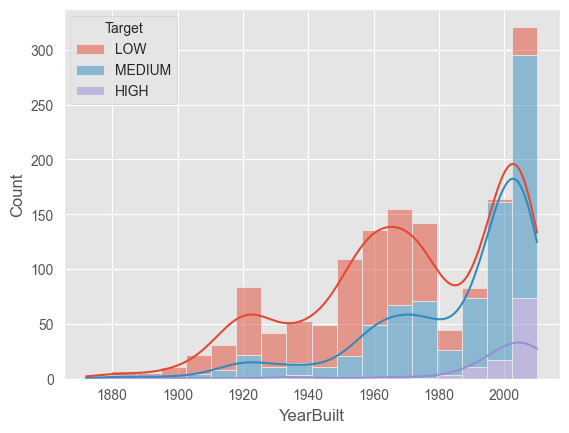

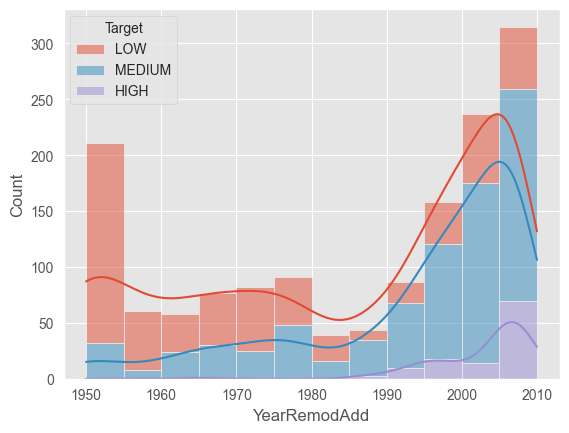

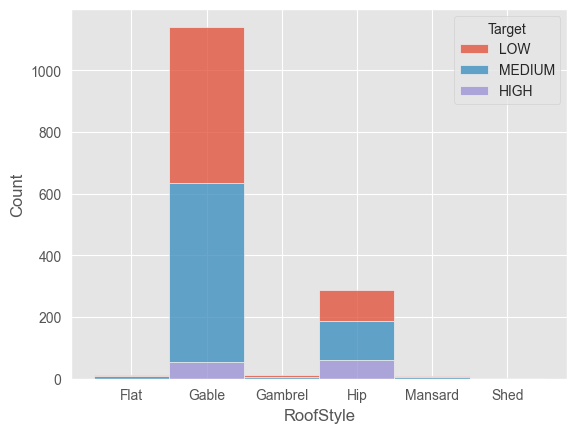

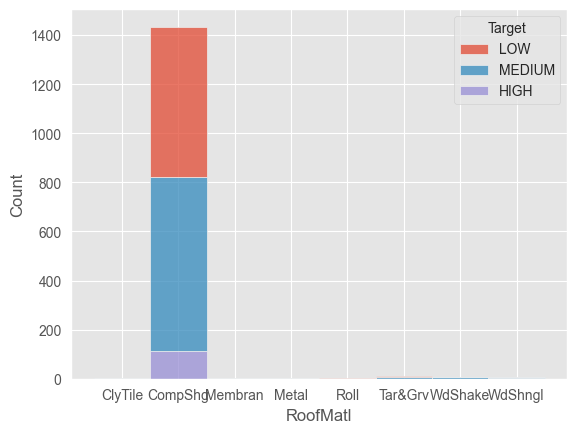

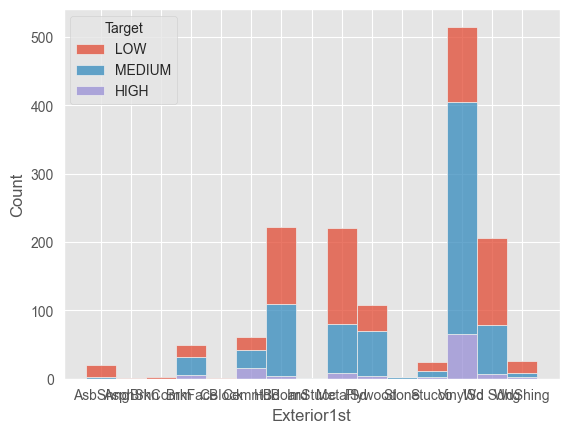

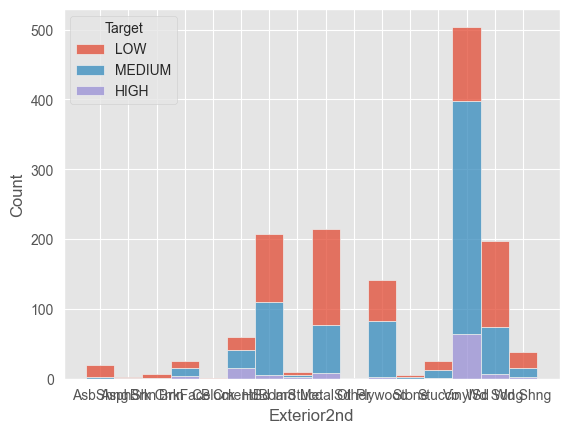

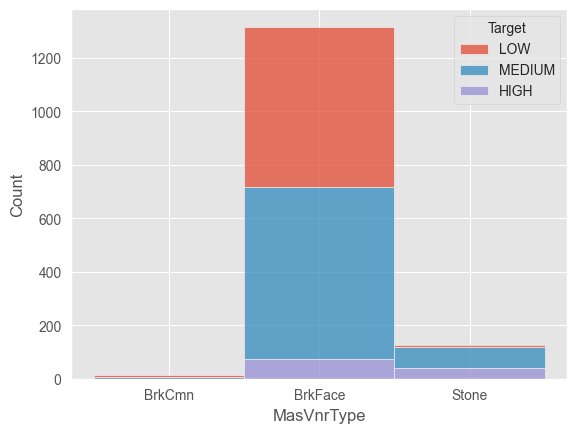

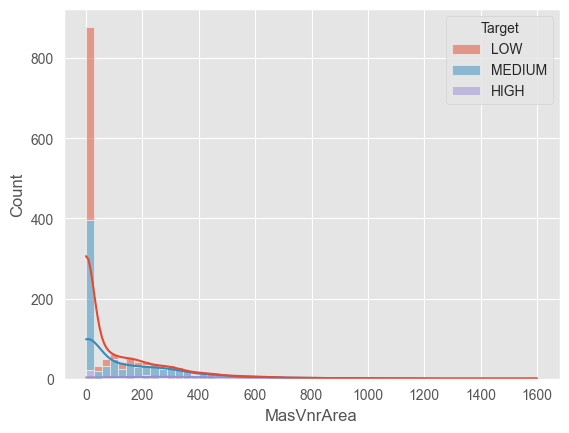

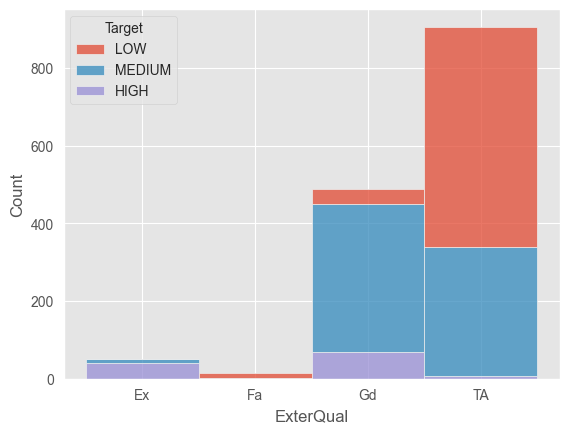

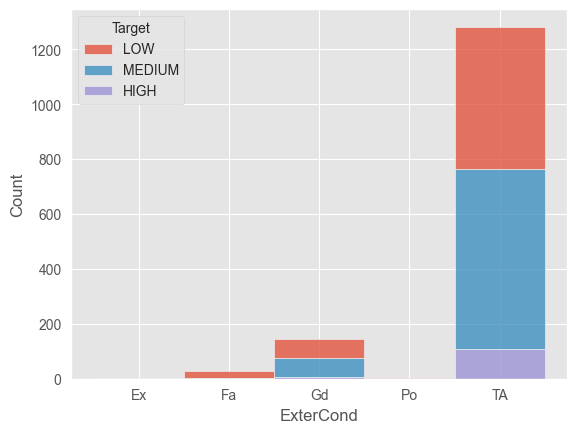

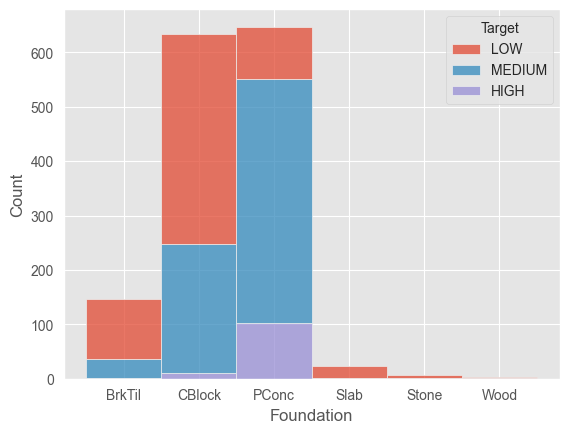

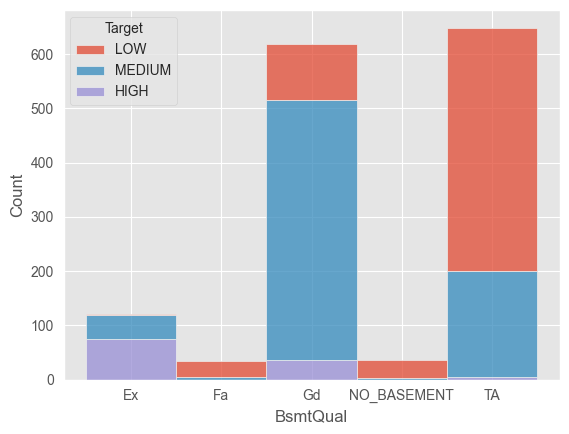

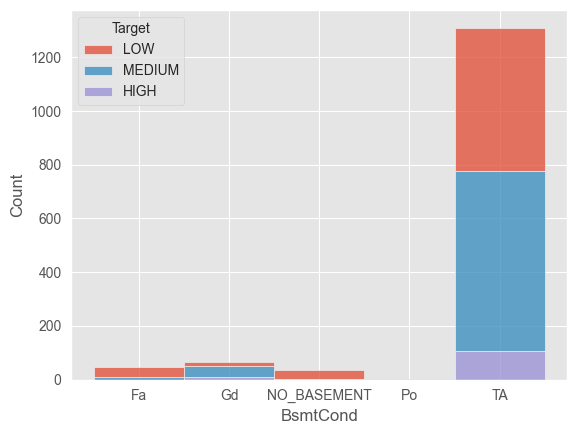

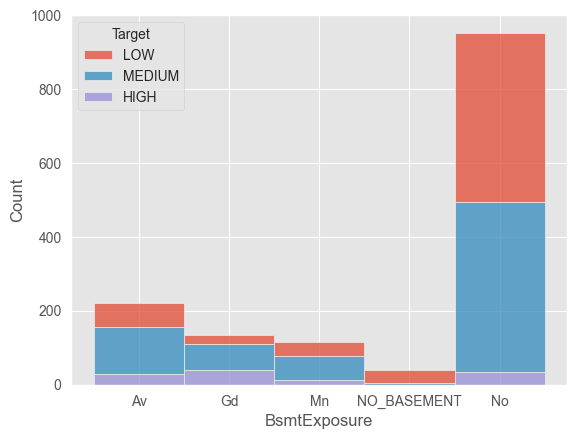

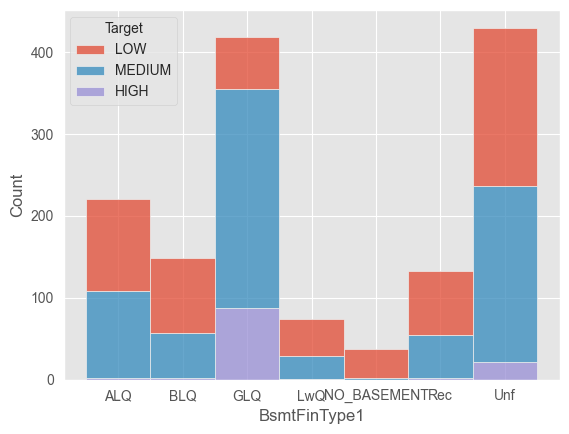

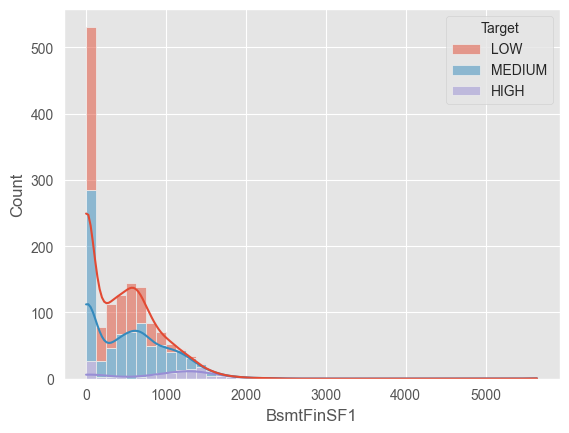

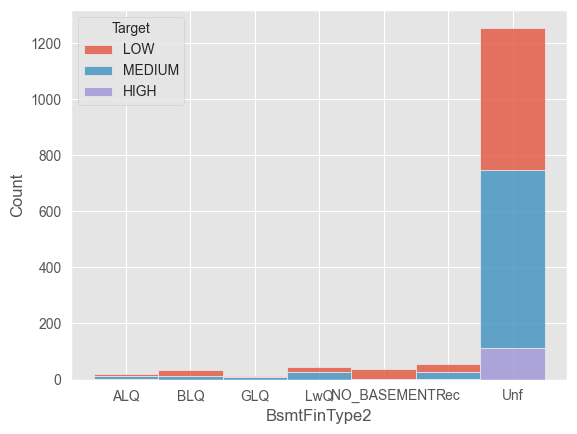

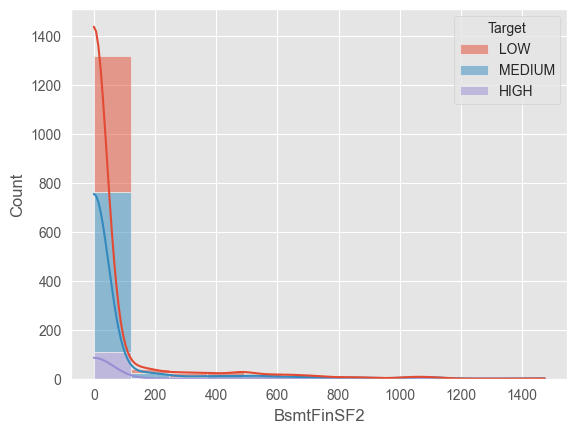

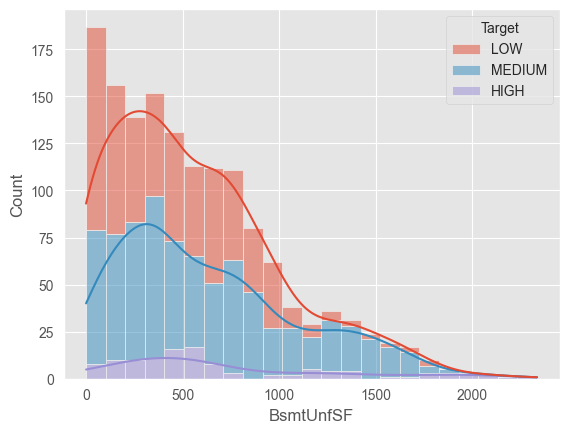

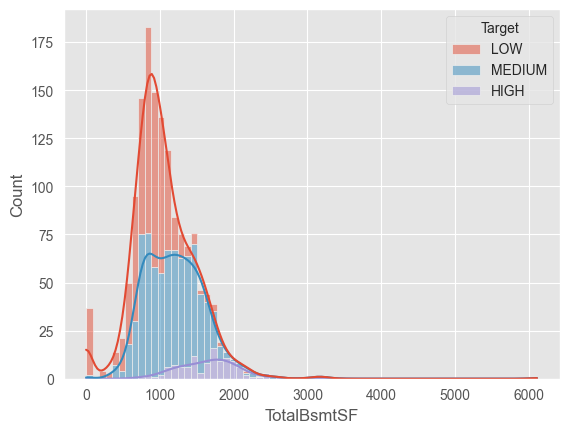

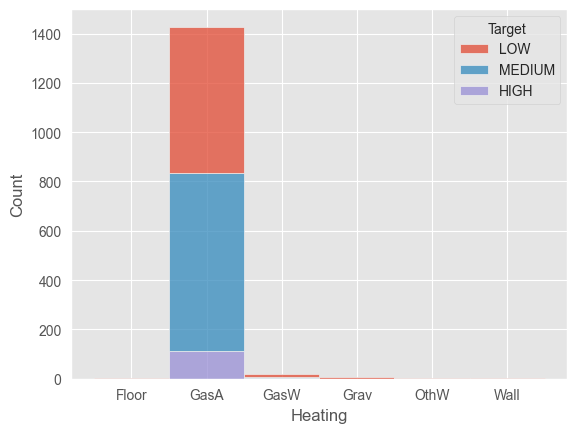

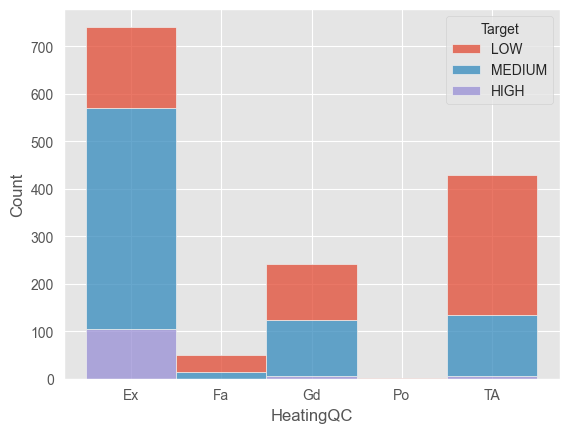

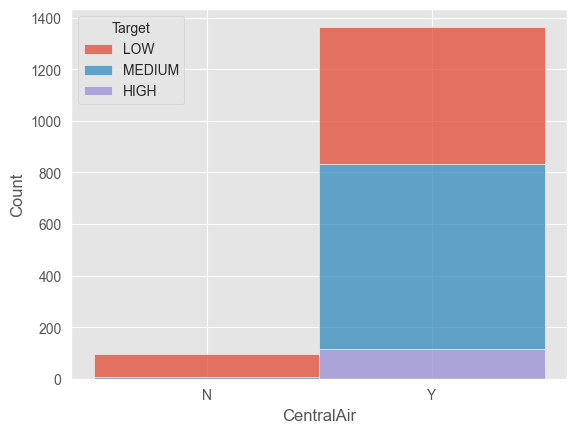

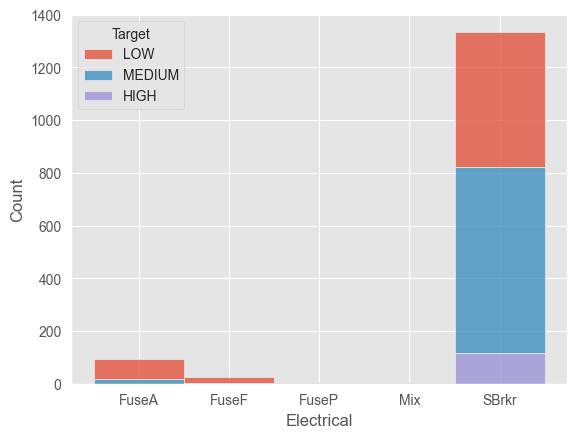

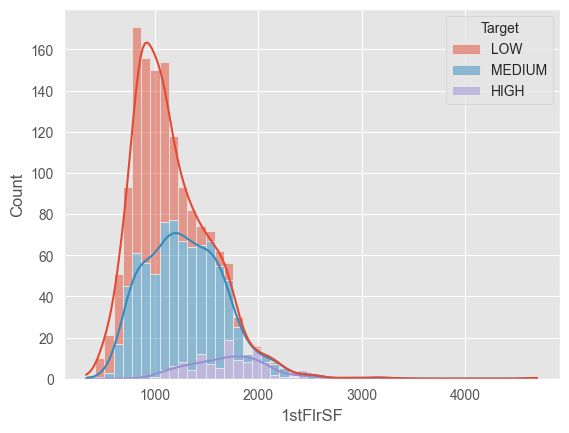

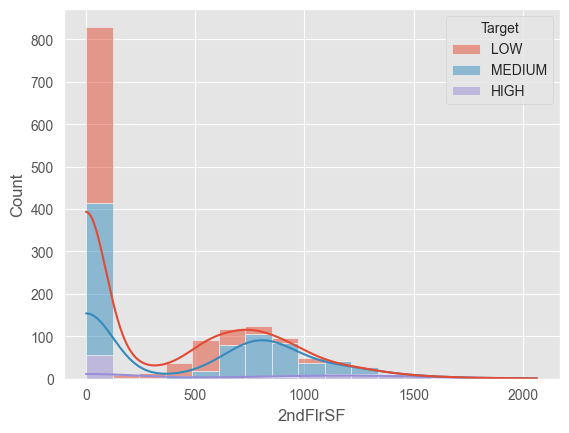

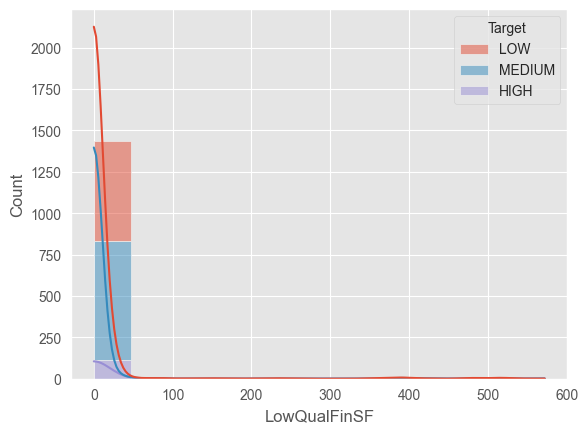

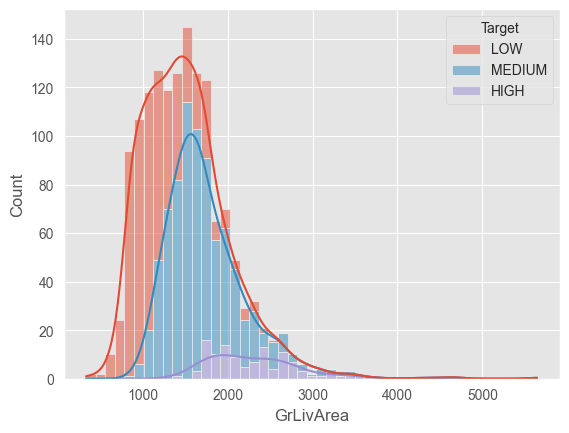

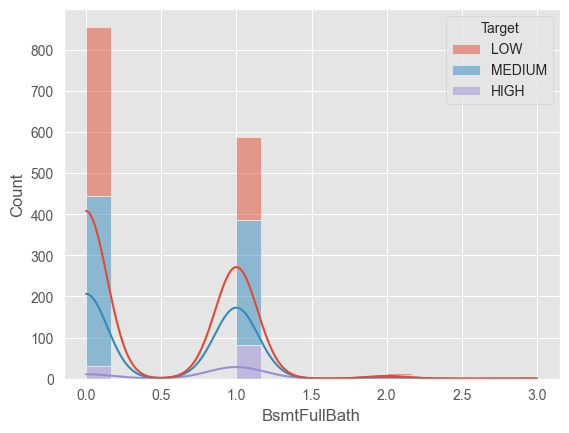

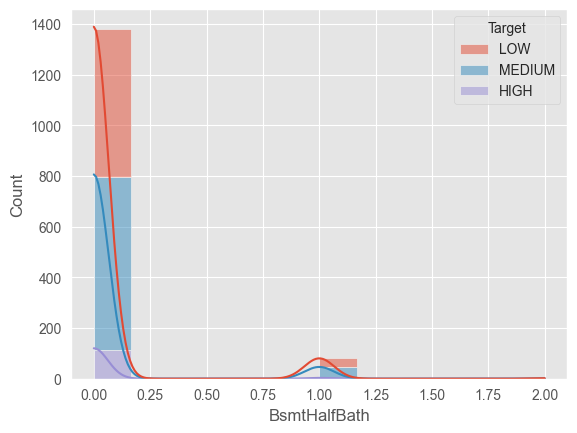

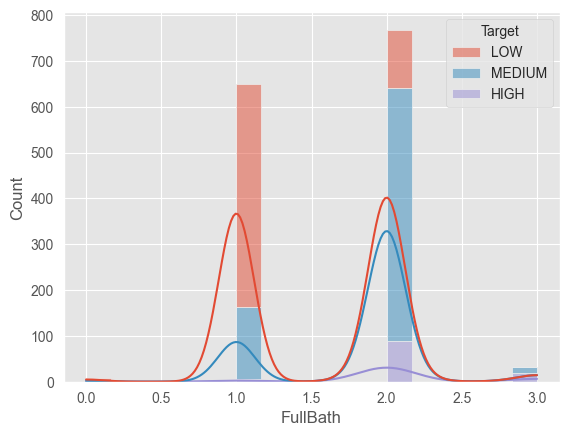

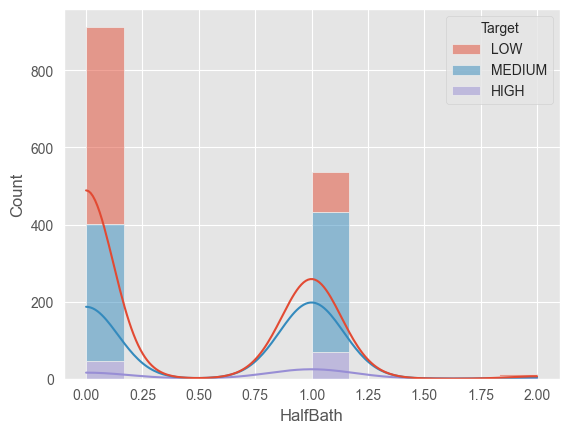

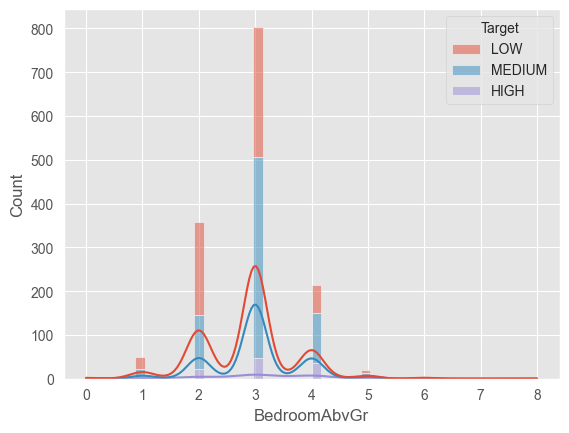

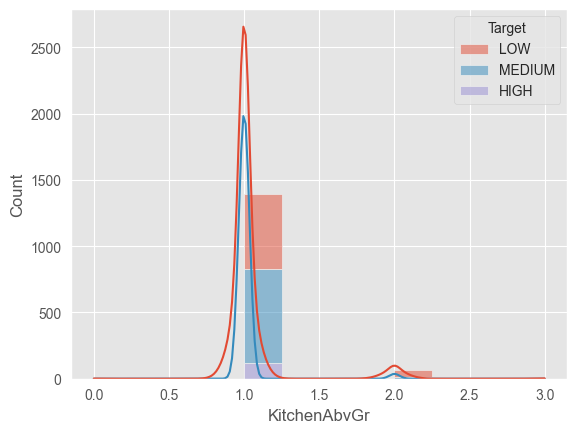

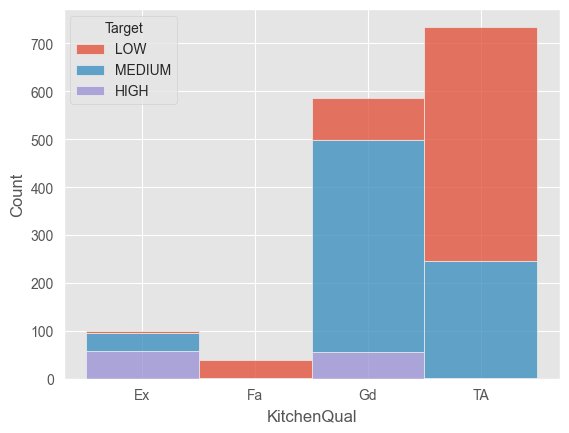

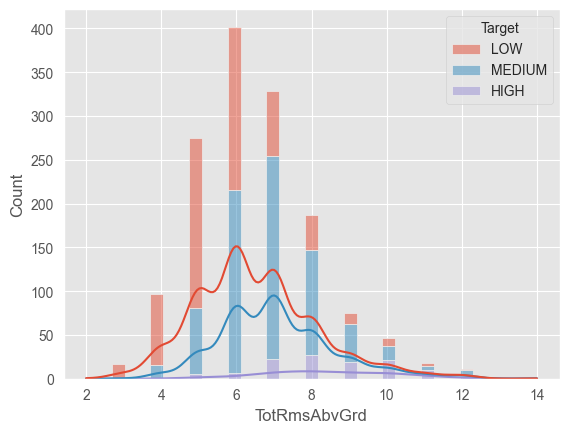

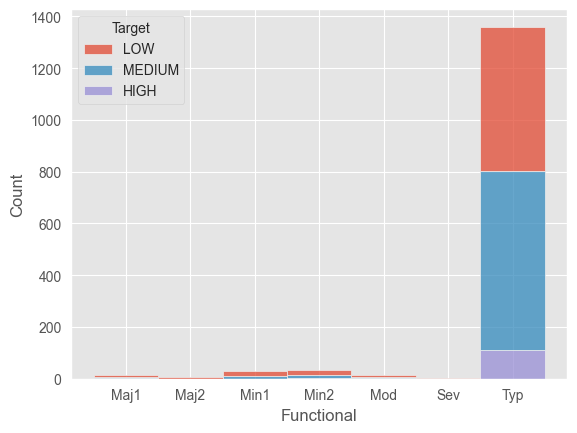

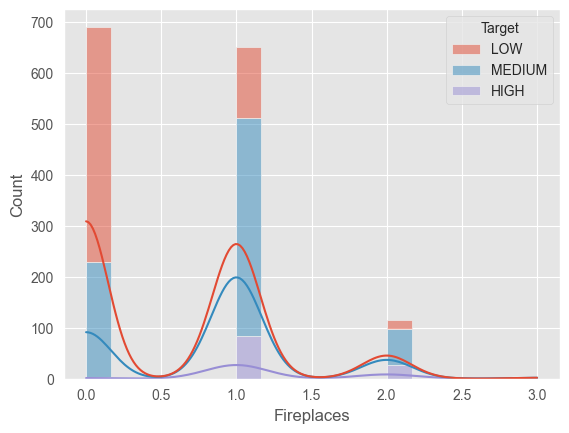

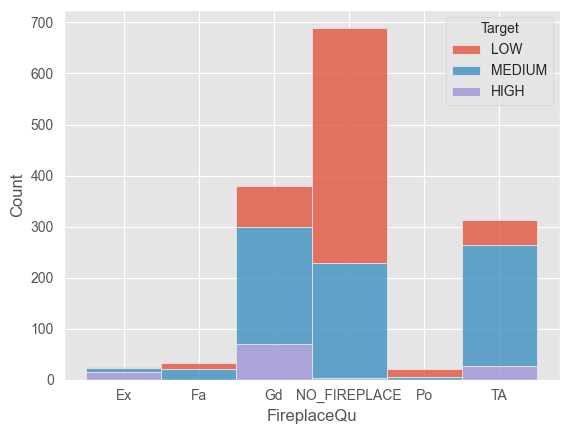

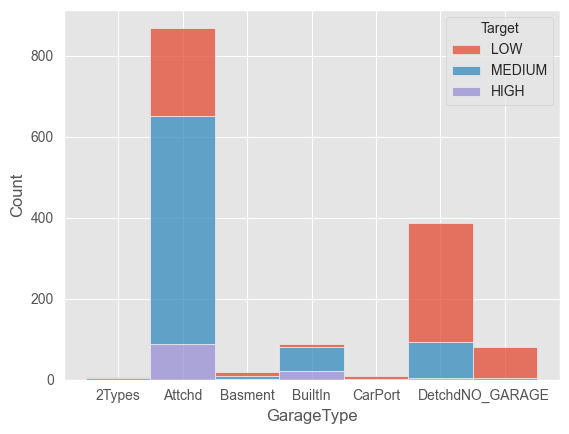

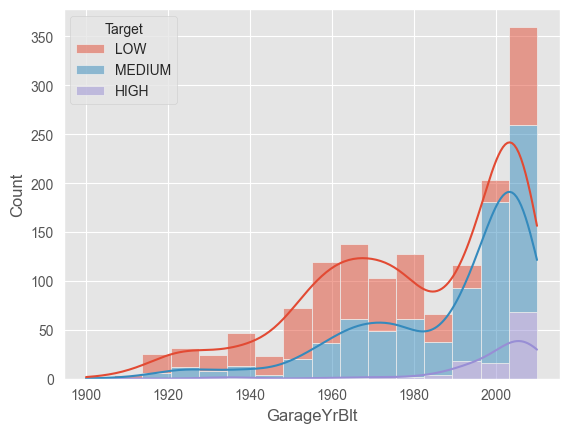

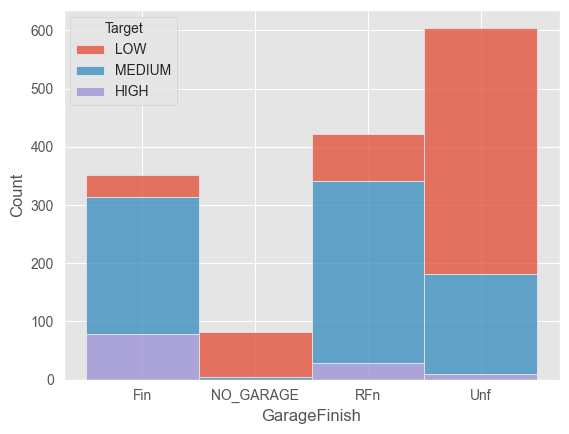

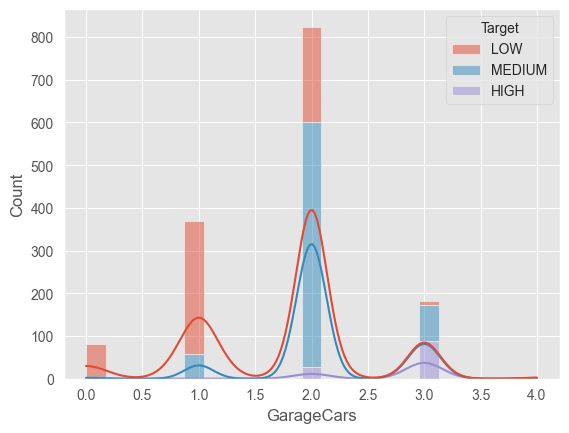

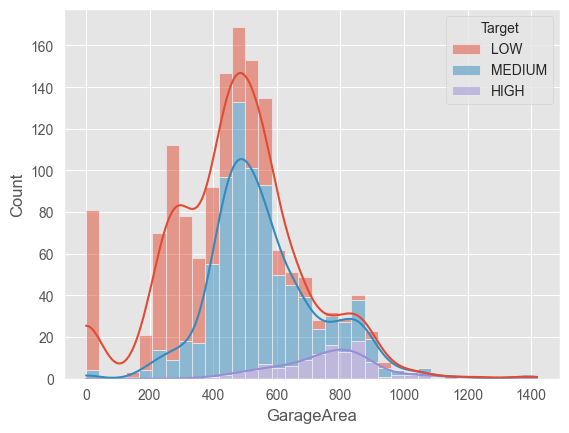

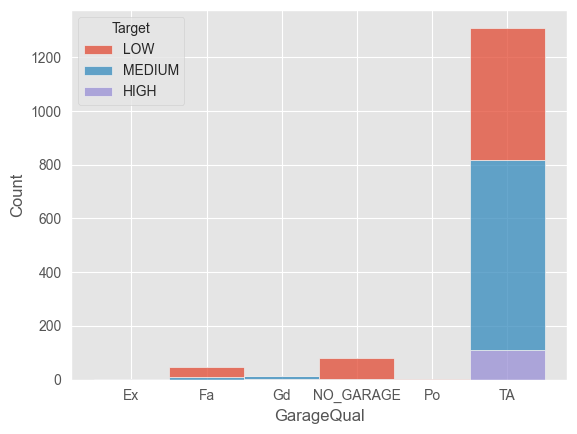

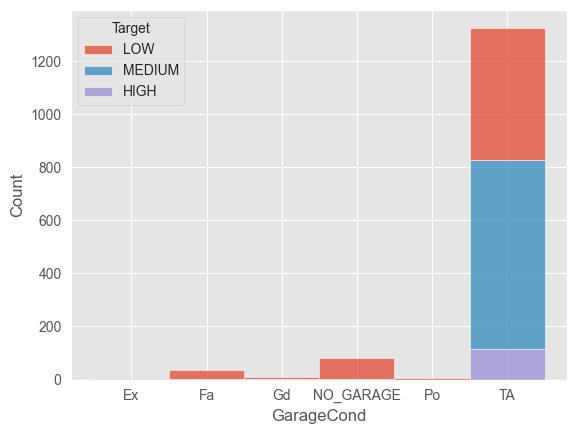

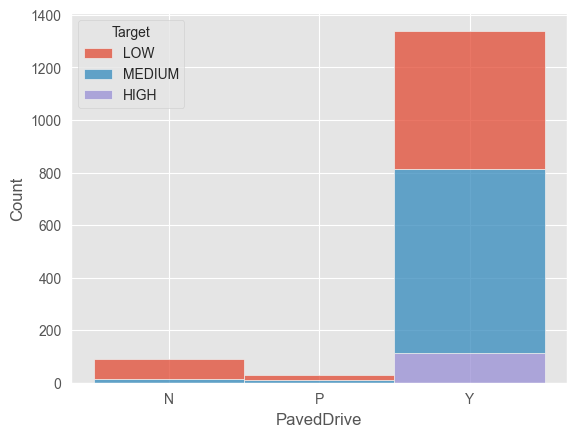

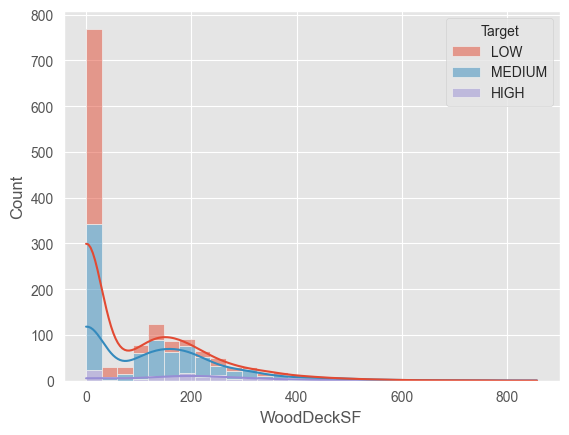

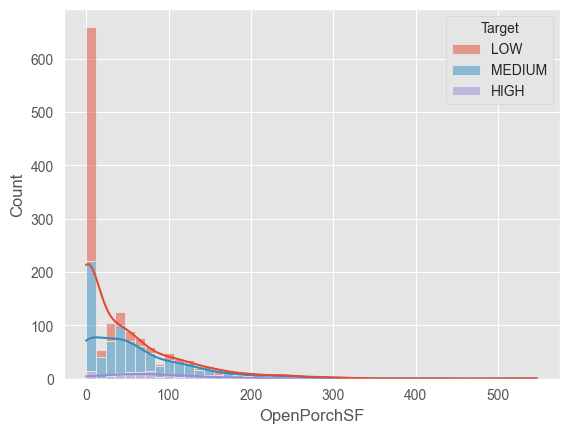

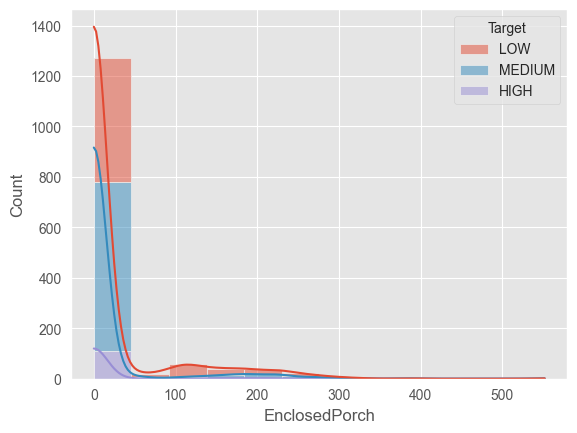

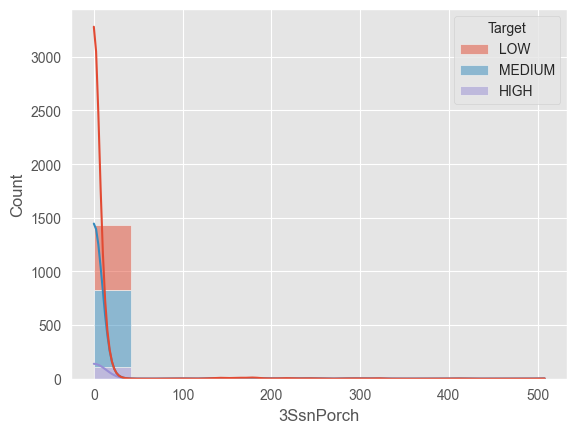

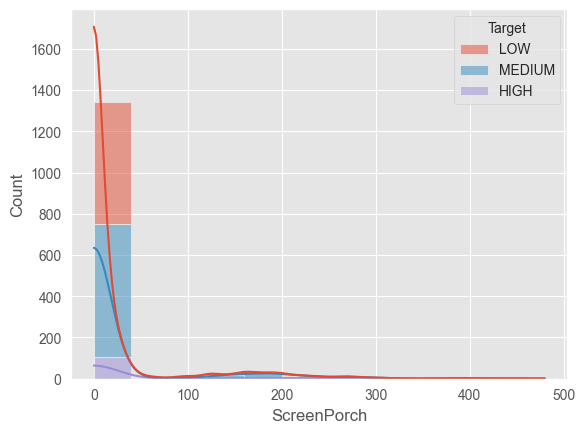

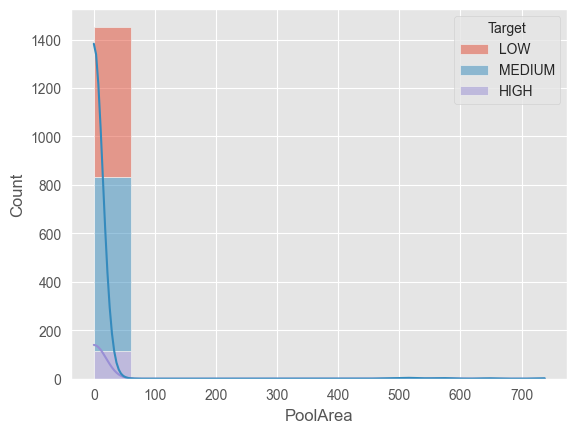

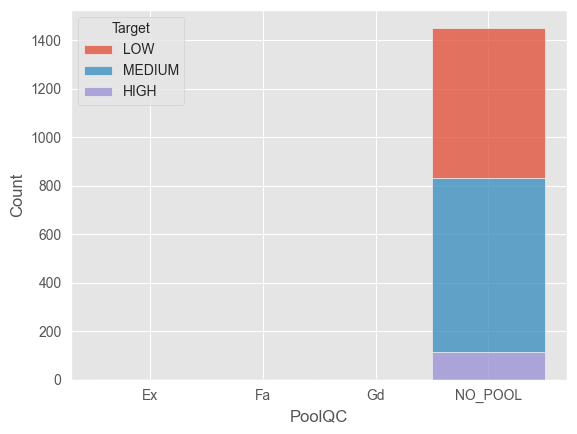

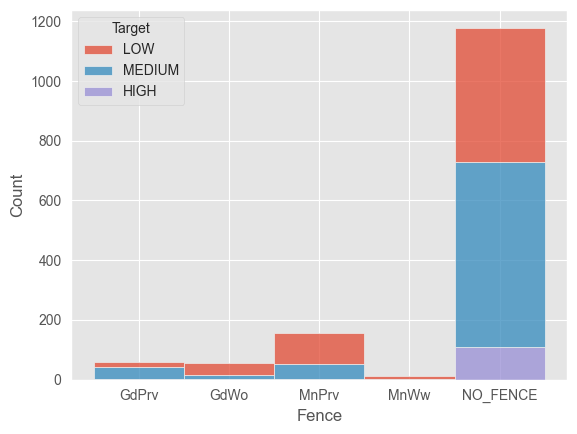

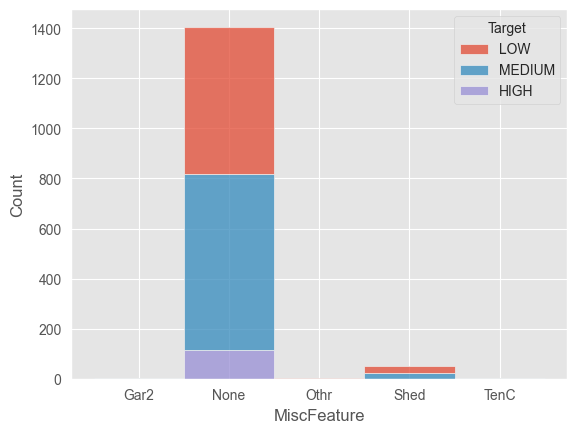

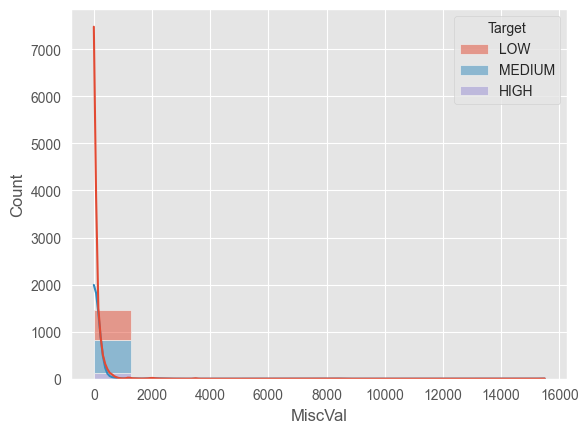

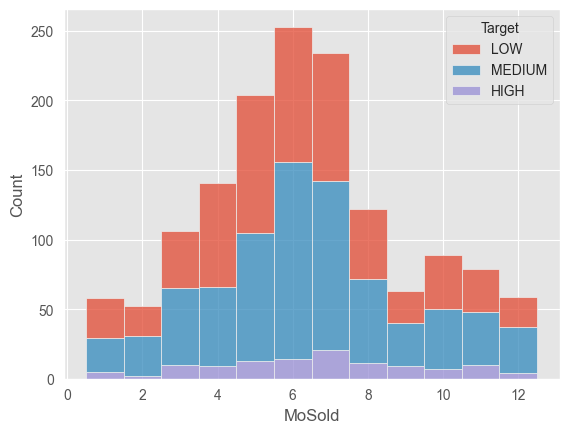

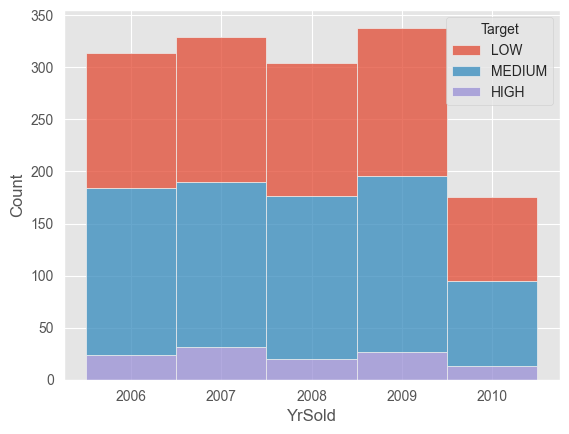

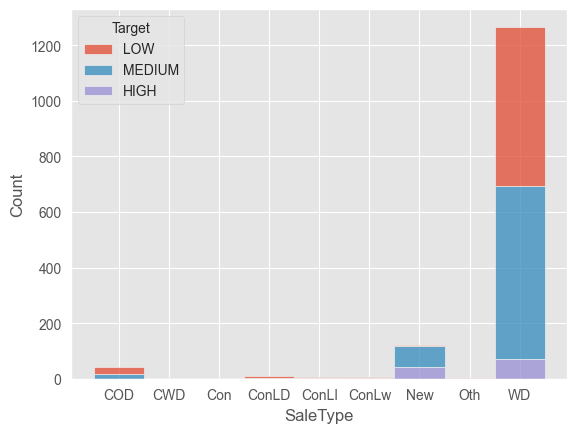

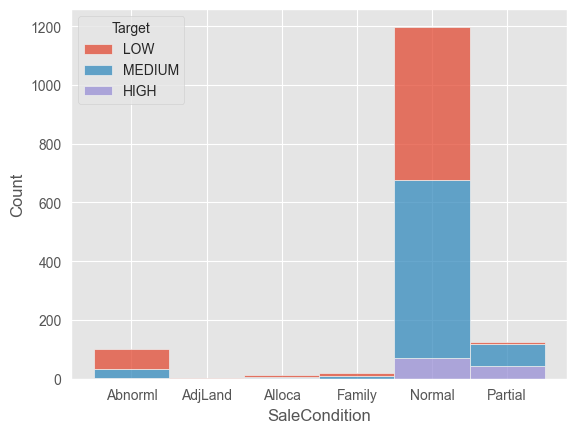

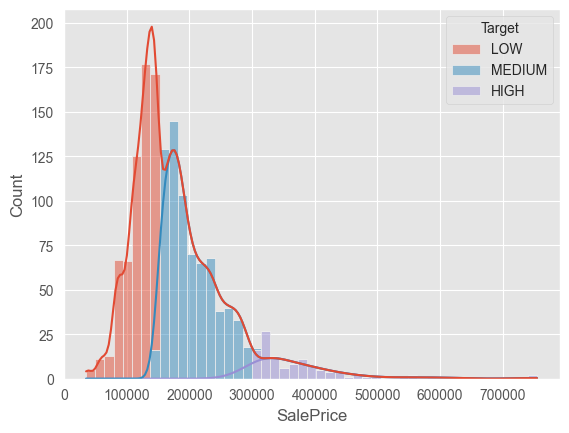

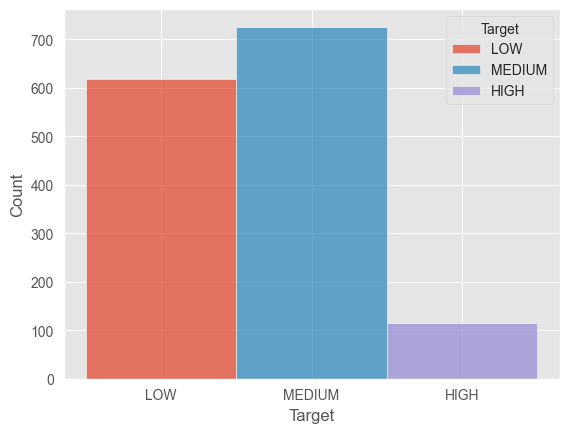

In [184]:
categorical_attributes = []
numerical_attributes = []
for attribute in data_set.columns:
    if data_set[attribute].dtype == 'category' or attribute == 'MoSold' or attribute == 'YrSold':
        categorical_attributes.append(attribute)
    else:
        numerical_attributes.append(attribute)
numericDF = data_set[data_set.columns.difference(categorical_attributes)]

for attr in data_set.columns.tolist():
        if data_set[attr].dtype != 'category':
            sb.histplot(x=data_set[attr], hue='Target', data=data_set, multiple='stack', kde=True)
        else:
            sb.histplot(x=data_set[attr], hue='Target', data=data_set, multiple='stack')
        plt.show()


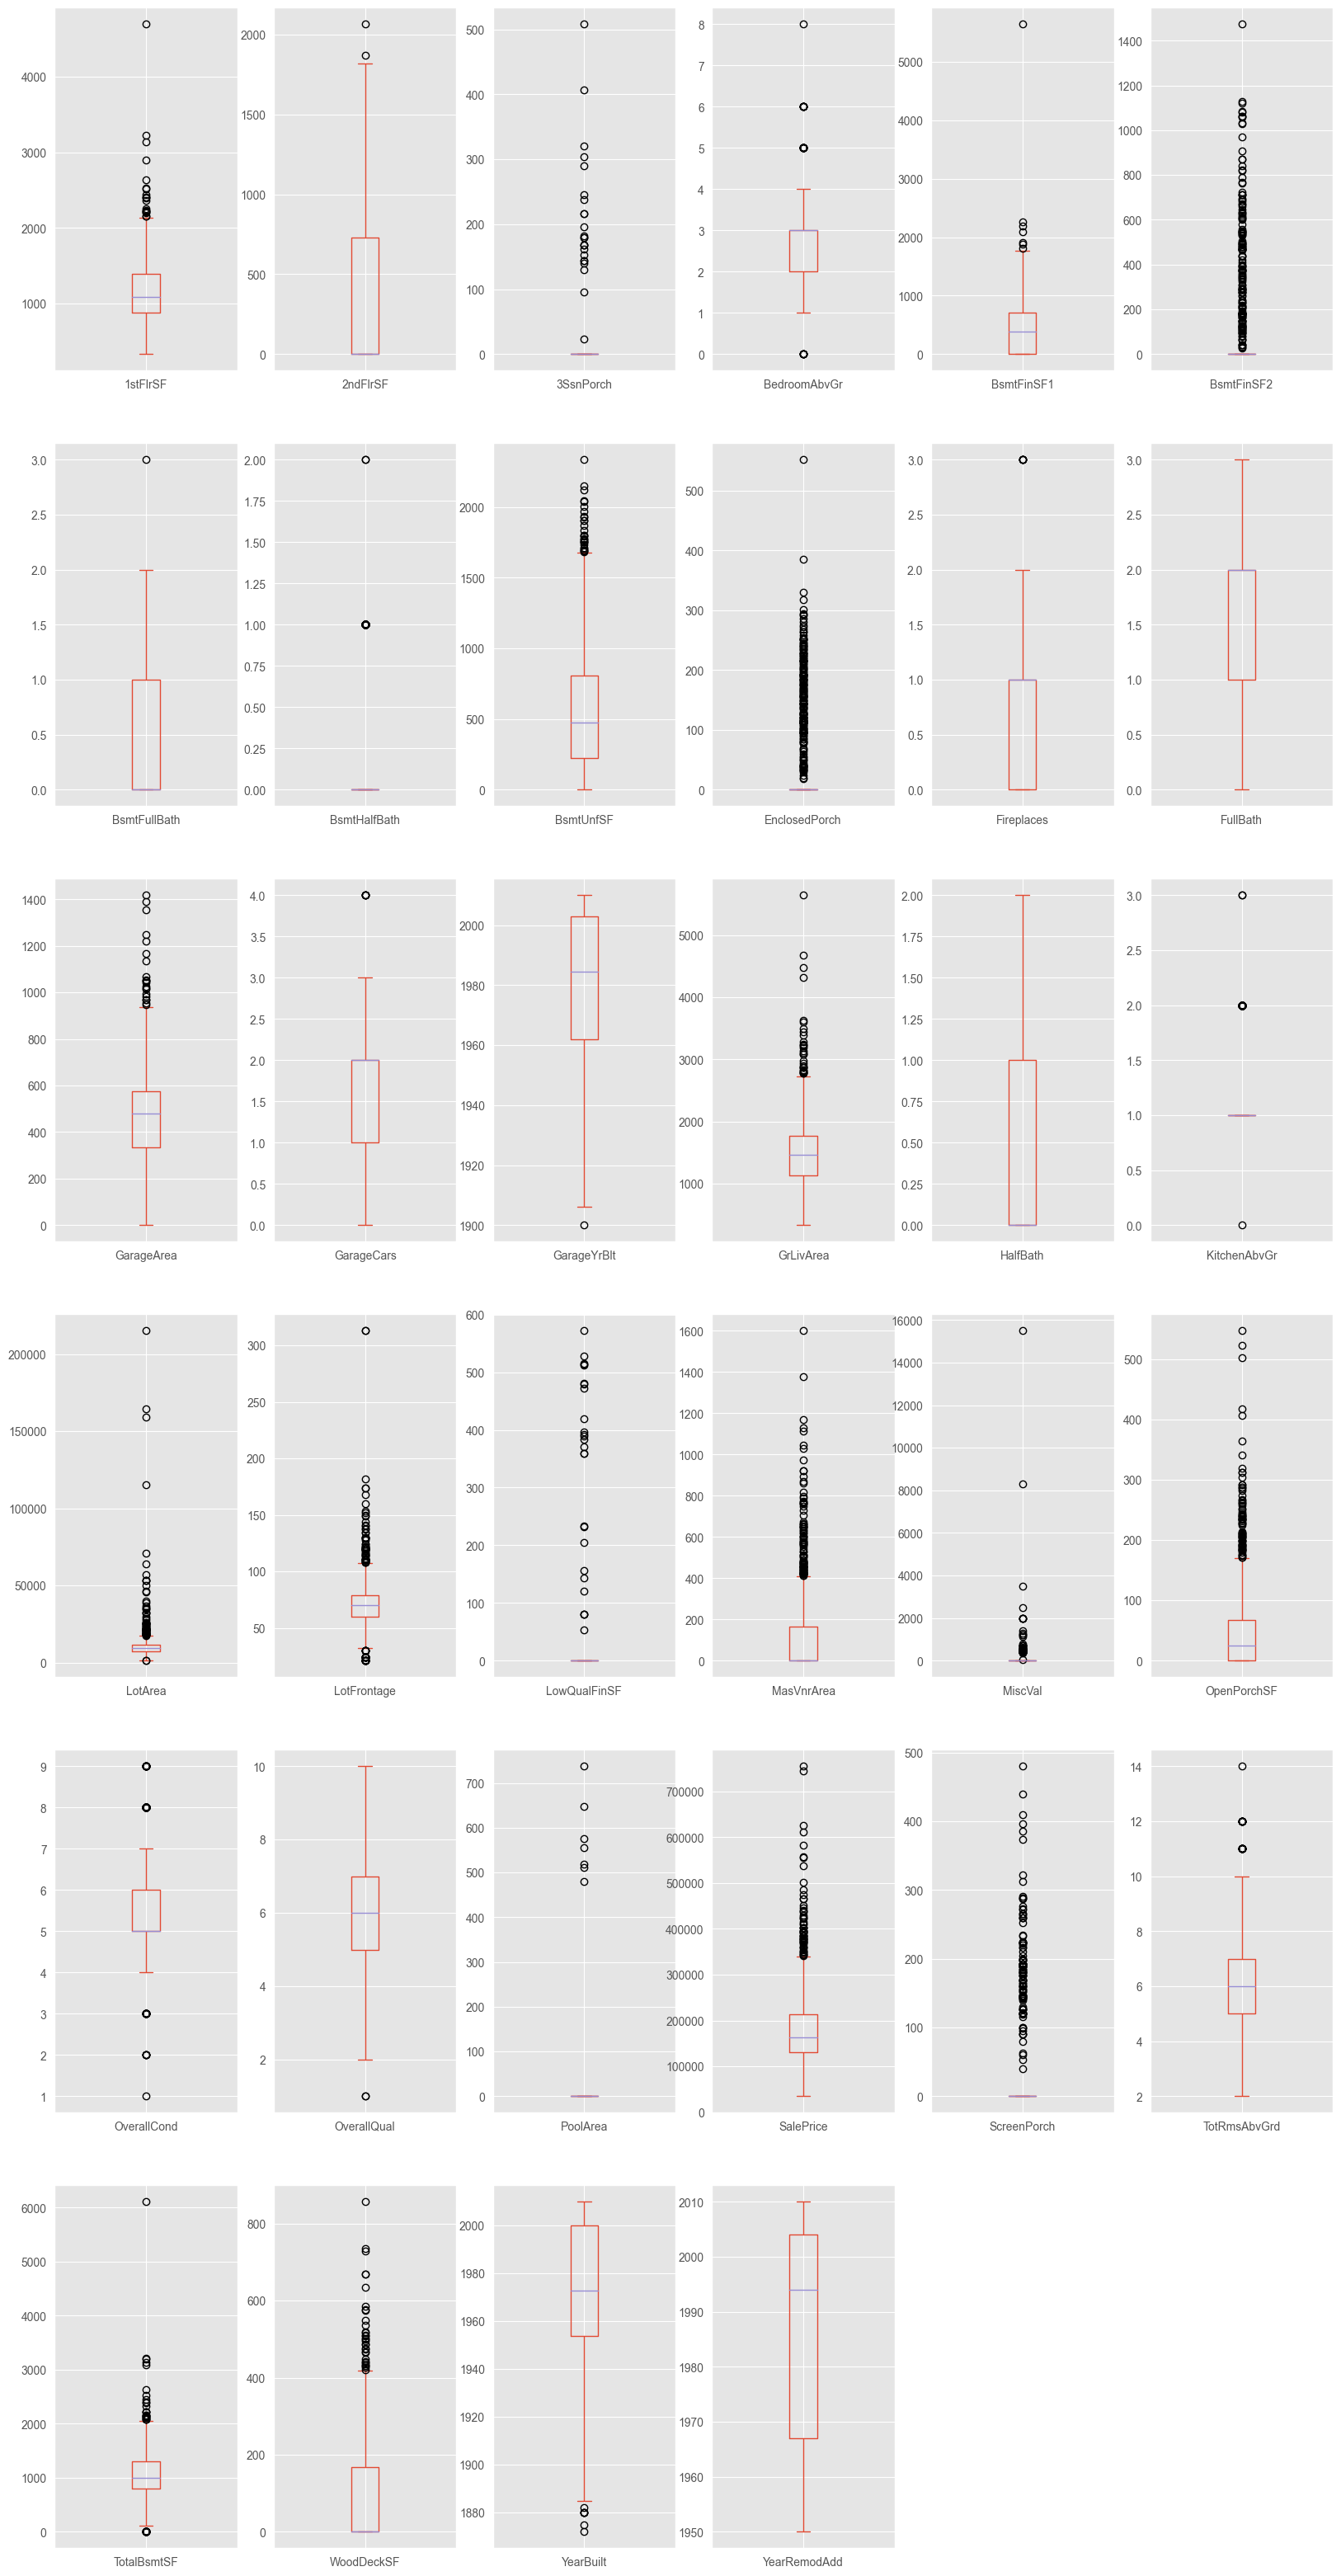

In [185]:
numerical_data_set = data_set[data_set.columns.difference(categorical_attributes)]
numerical_data_set.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(20, 40), layout=(6, 6))
plt.show()

Ci sono delle correlazione abbastanza marcate tra :
 - GarageCars - GarageArea  oviamente più è grande il garage più macchine ci entrano (potremmo rimuovere GarageCars)
 - TotRmsAbvGrd - GrLivArea più è grande il piano più stanze ci sono (potremmo rimuovere TotRmsAbvGrd)
 - SalesPrice - OverallQual nella maggior parte dei casi il prezzo è proporzionale alla qualità generale della casa
 - SalesPrice - GrLivArea più è grande la casa più costa
 - YrBuilt - GarageYrBlt molti garage sono stati costruiti nello stesso anno di costruzione della casa.
 - TotalBsmtSF - 1stFirSF le fondamenta di molte case hanno la stessa area del primo piano. (potremmo rimuovere uno dei due)

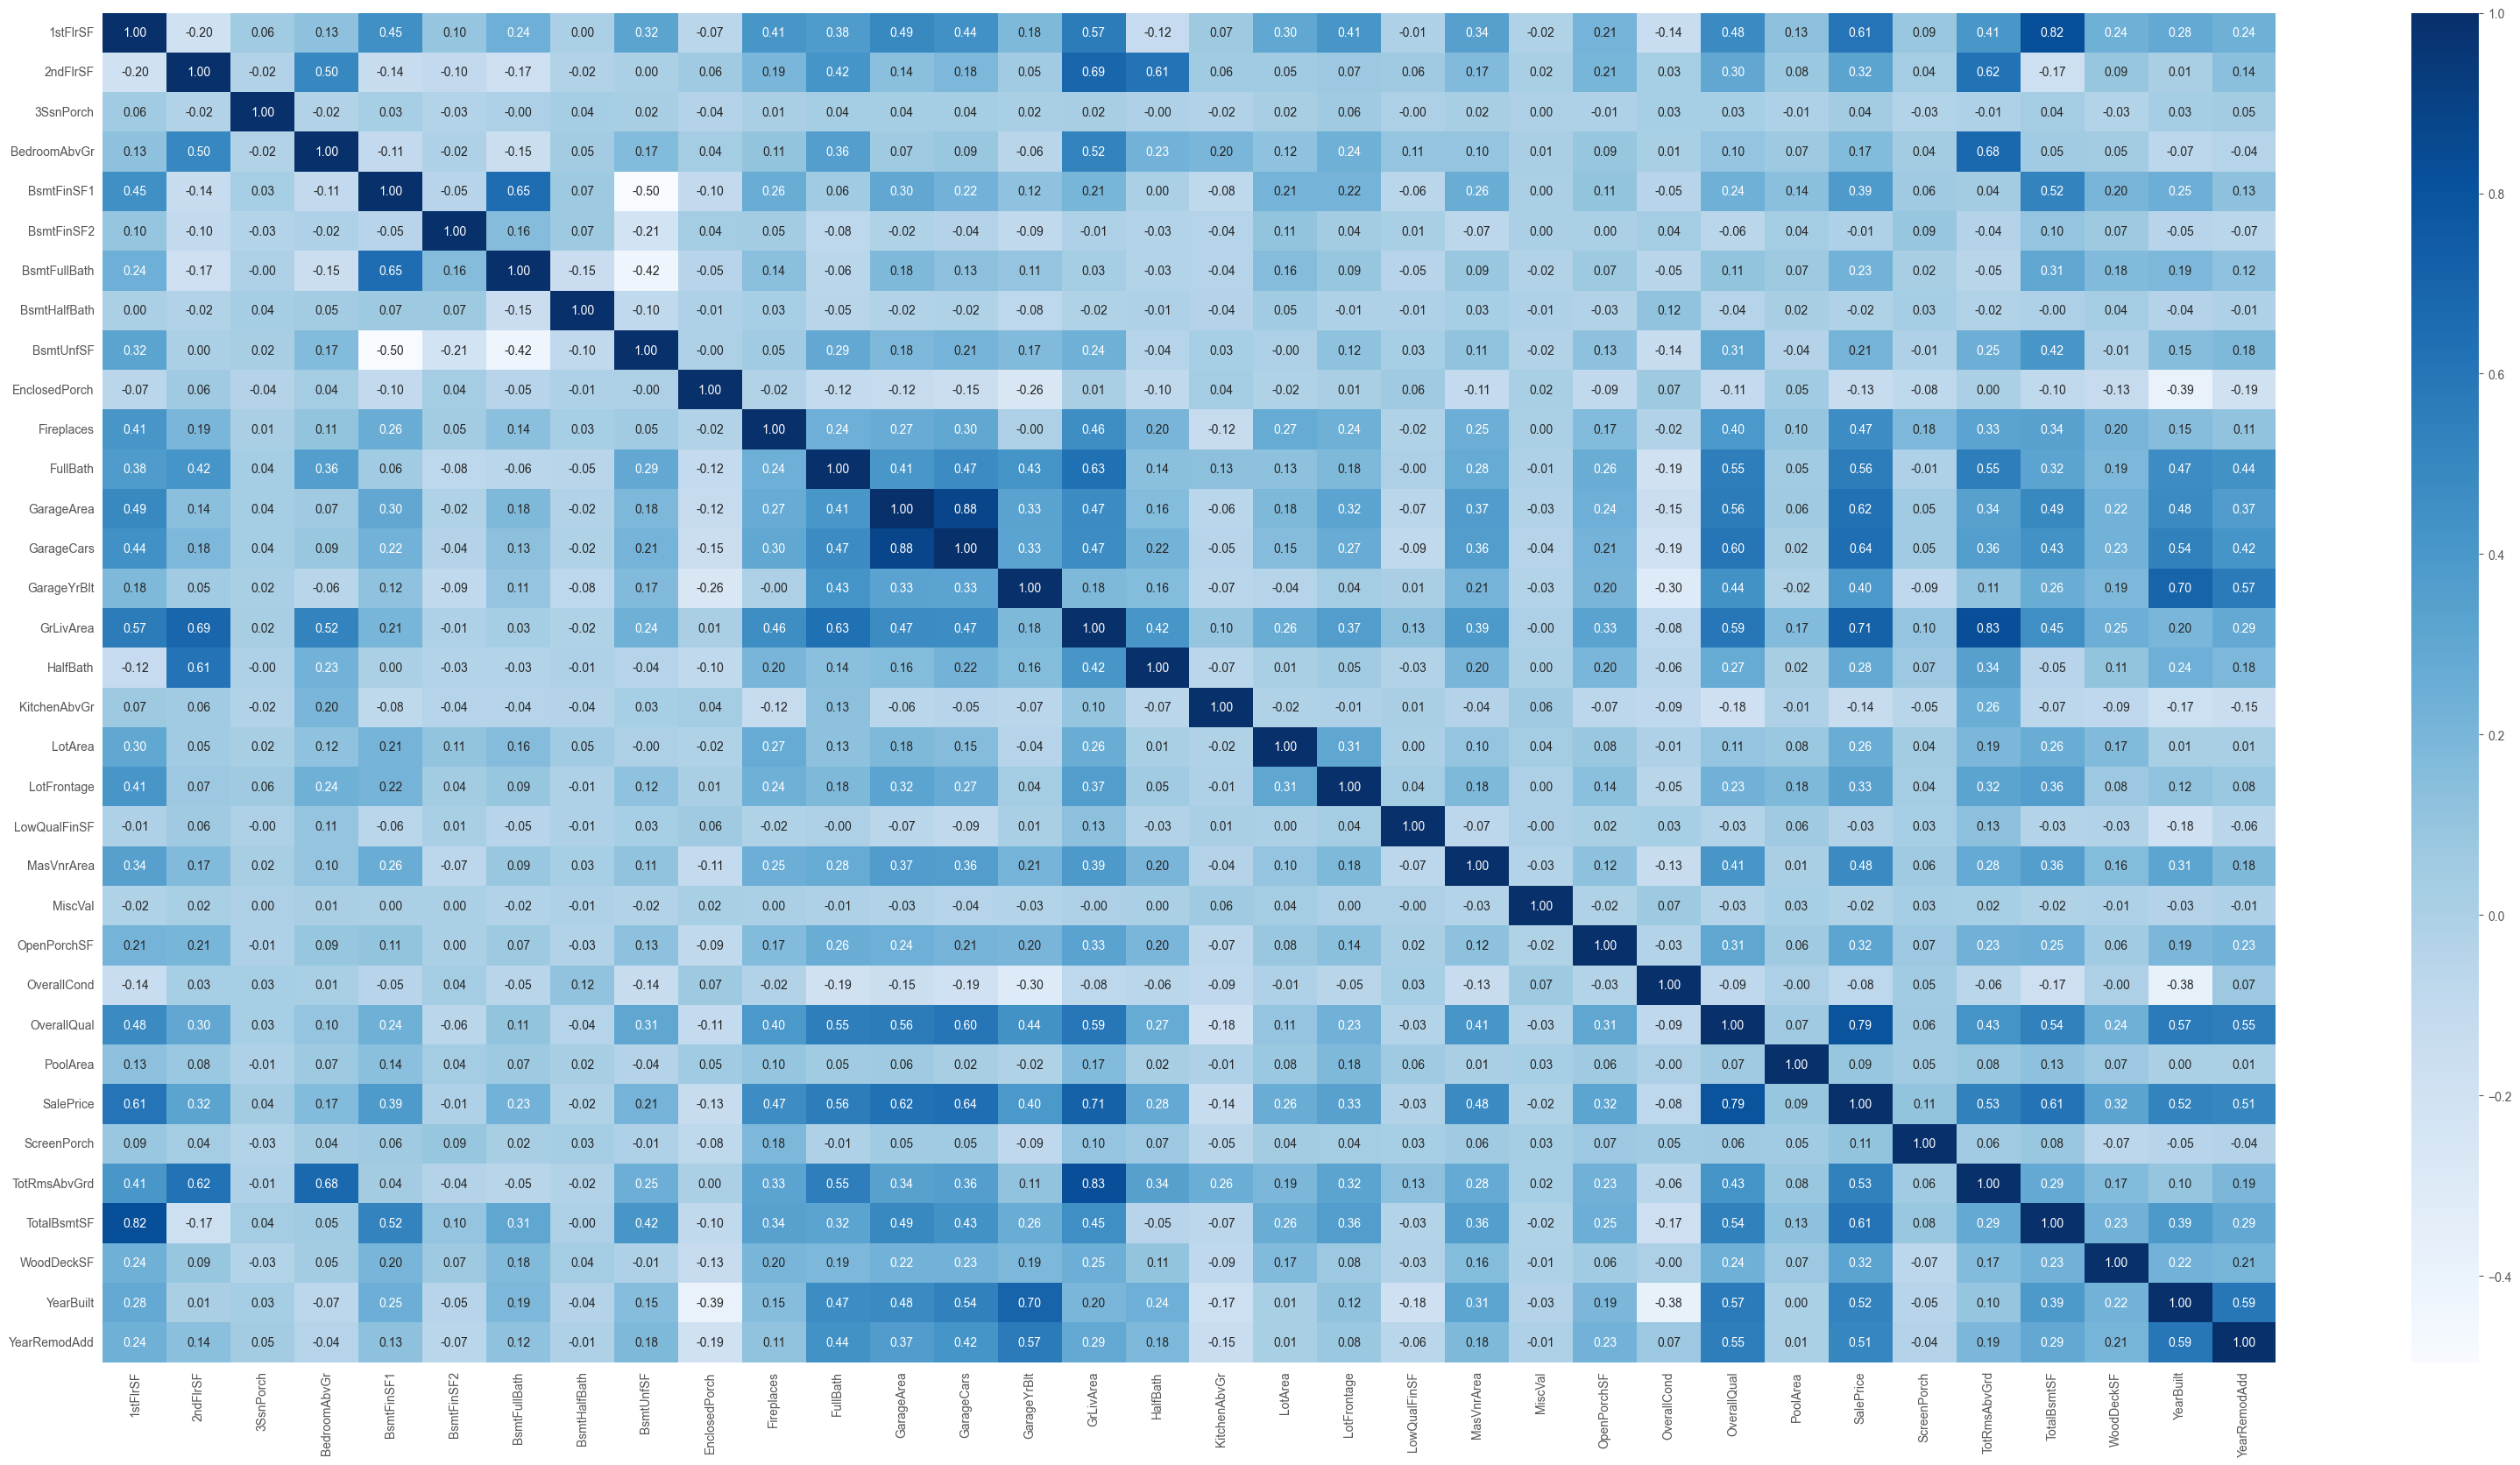

In [186]:
plt.figure(figsize=(40, 20))
sb.heatmap(numerical_data_set.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

Rimuovo gli attributi che presentano correlazioni marcate

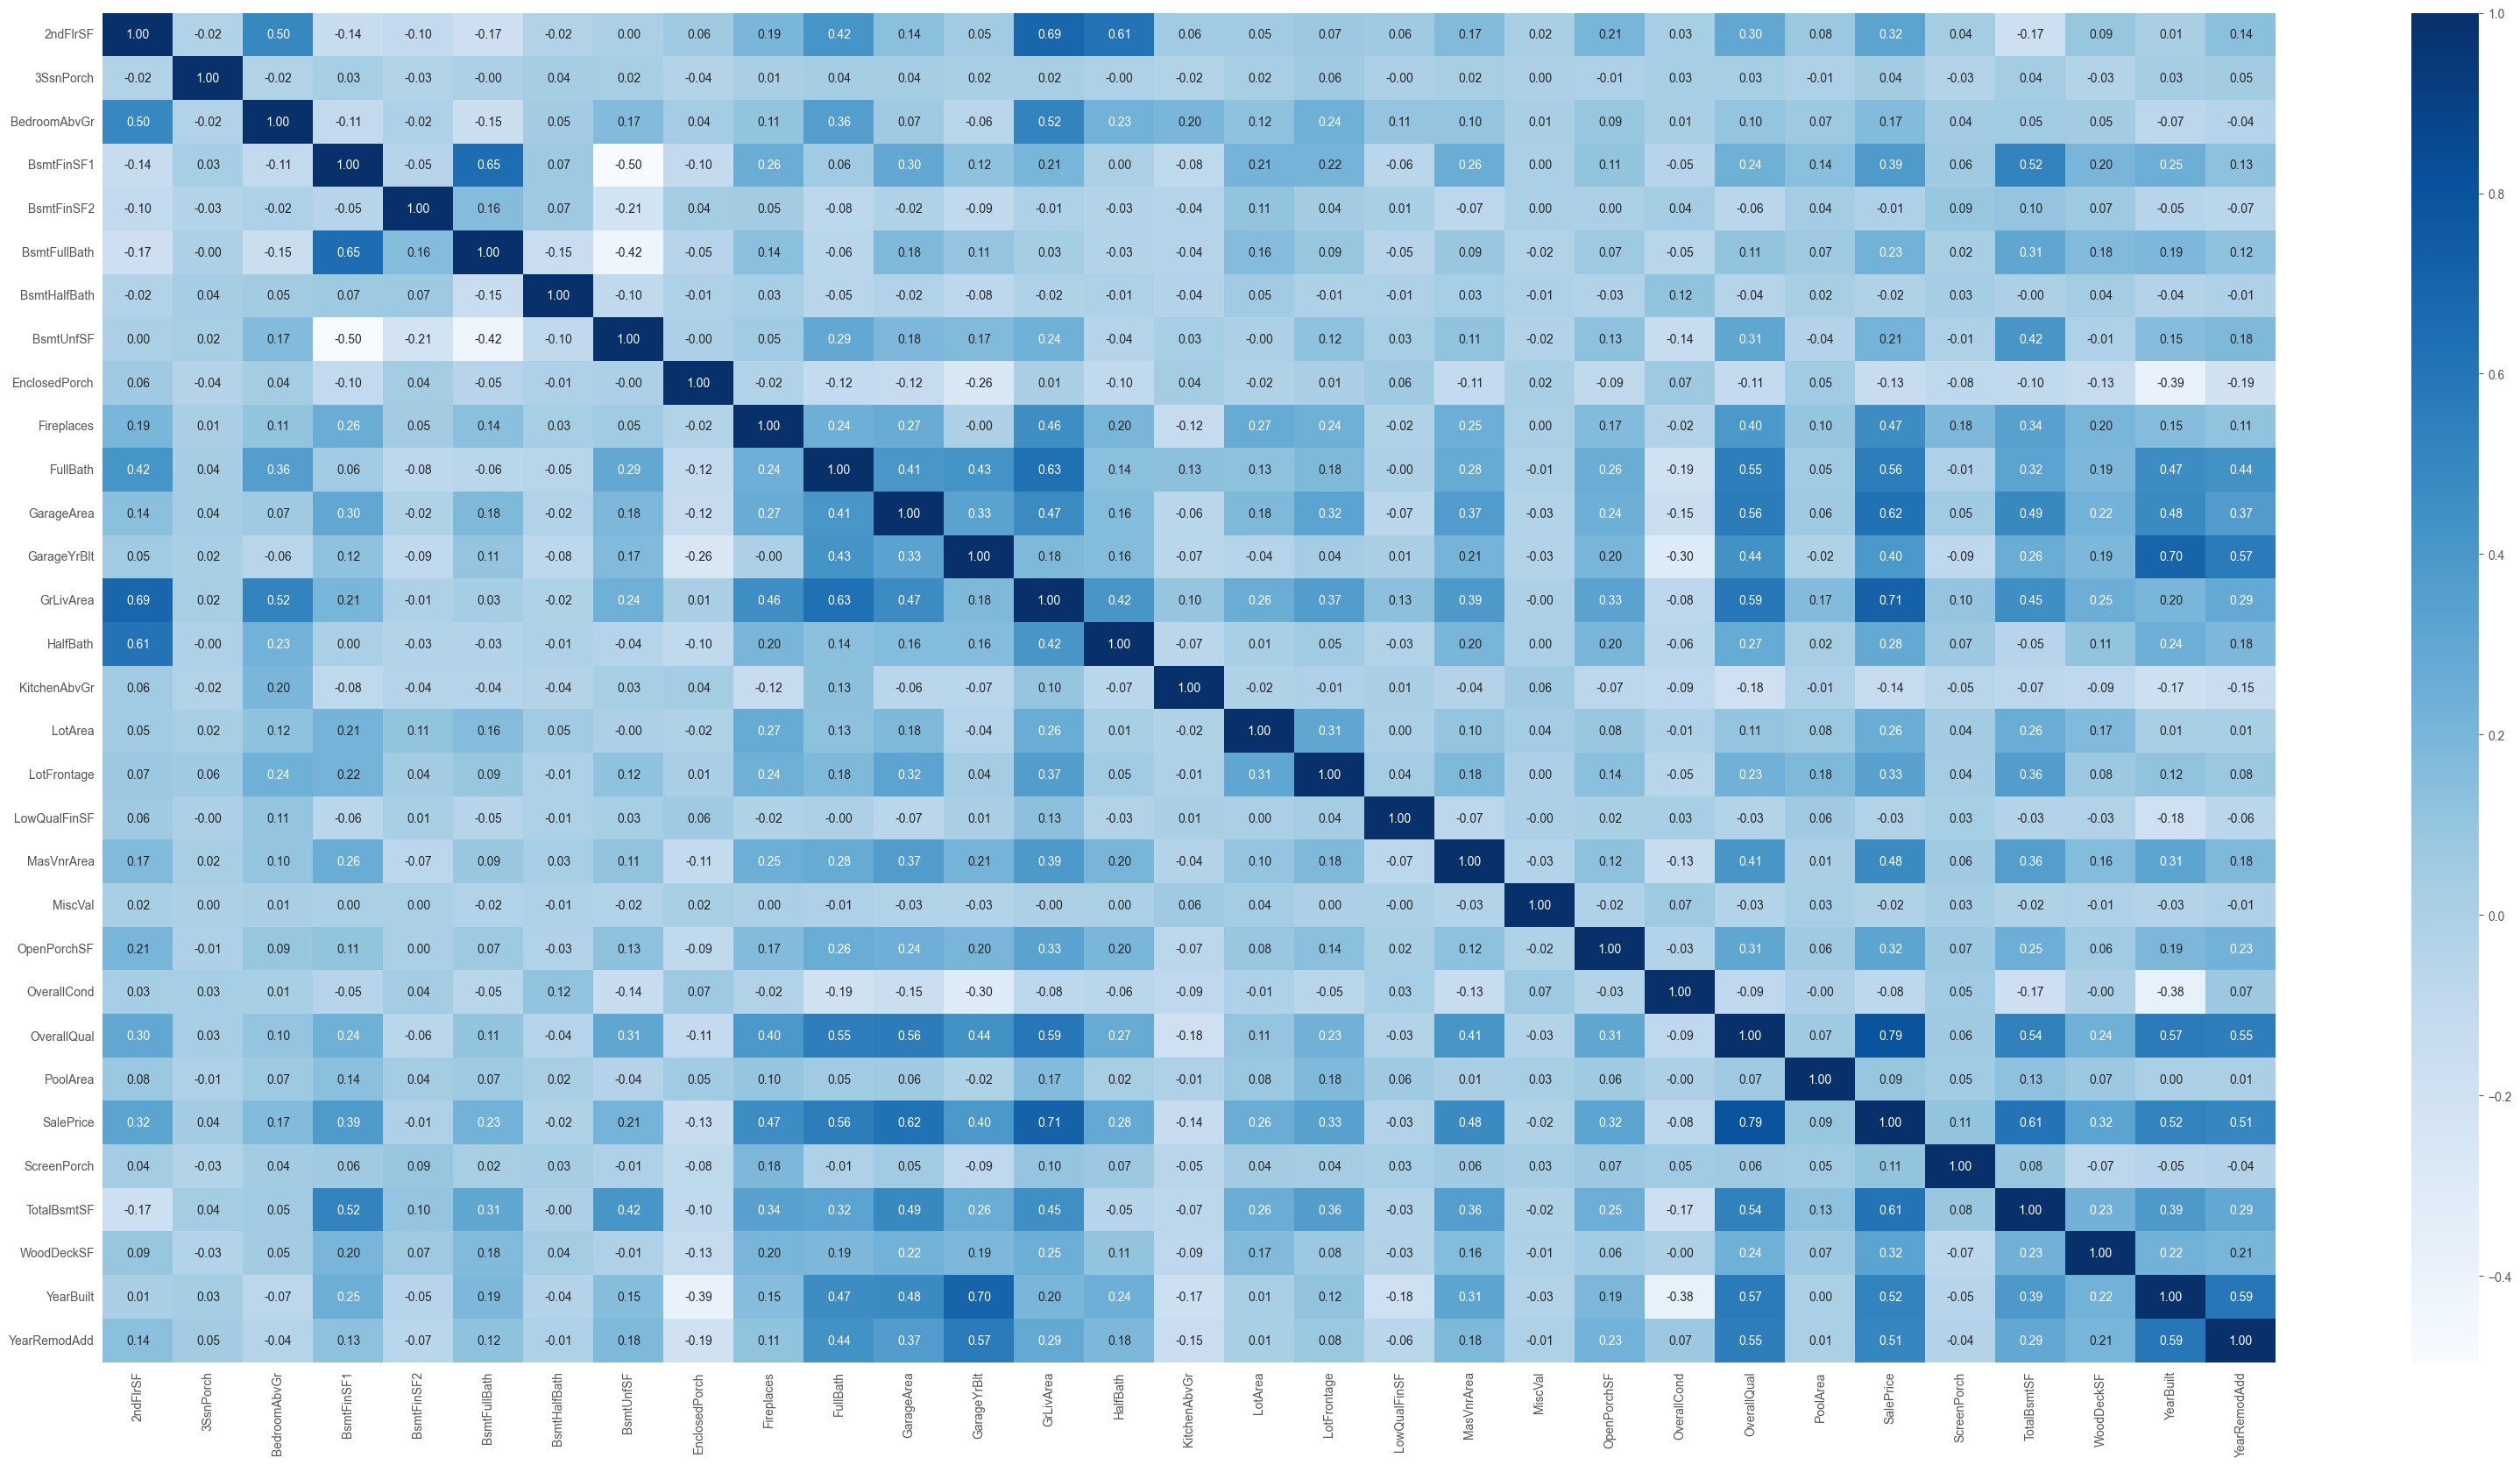

In [187]:
numerical_data_set = numerical_data_set[numerical_data_set.columns.difference(['GarageCars','TotRmsAbvGrd','1stFlrSF'])]
plt.figure(figsize=(40, 20))
sb.heatmap(numerical_data_set.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

2)Data Preparation

Binarizzo gli attributi categorici e rimuovo gli attributi Target e SalePrice

In [188]:
cat_attributes = data_set.select_dtypes(include = ['category']).columns.tolist()
cat_attributes.remove('Target')
data_set_2 = pd.get_dummies(data_set, columns = cat_attributes)
data_set_2.drop('Target', axis=1, inplace=True)
data_set_2.drop('SalePrice', axis=1, inplace=True)
data_set_2.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd   
0         65.0     8450            7            5       2003          2003  \
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw   
0       196.0         706           0        150  ...           False  \
1         0.0         978           0        284  ...           False   
2       162.0         486           0        434  ...           False   
3         0.0         216           0        540  ...           False   
4       350.0         655           0        490  ...           False   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml   
0         False         False         True                  False  \
1         False         False         True                  False   
2         False         False         True                  False   
3         False         False         True                   True   
4         False         False         True                  False   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family   
0                  False                 False                 False  \
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 330 columns]

In [189]:
data_set_2.shape

(1460, 330)

3) Modelling

In [190]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [191]:
x = np.array(data_set_2.values)
print(x)
y = np.array(data_set['Target'].values)
print(y)
seed = 101
x_train, y_train = x, y
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=seed)

[[65.0 8450 7 ... False True False]
 [80.0 9600 6 ... False True False]
 [68.0 11250 7 ... False True False]
 ...
 [66.0 9042 7 ... False True False]
 [68.0 9717 5 ... False True False]
 [75.0 9937 5 ... False True False]]
['MEDIUM' 'MEDIUM' 'MEDIUM' ... 'MEDIUM' 'LOW' 'LOW']


In [192]:
models = []
models.append(('C45', DecisionTreeClassifier(criterion='entropy', random_state=seed)))
models.append(('CART', DecisionTreeClassifier(criterion='gini', random_state=seed)))
models.append(('GaussianNaiveBayes', GaussianNB()))
models.append(('NeuralNetwork', MLPClassifier(hidden_layer_sizes=(50, 20, ), max_iter=200, verbose=True,
                                              random_state=seed)))
for name, model in models:
    print(name)

    model.fit(x_train, y_train)
    y_val_pred = model.predict(x_val)

    print('Classification metrics: ')
    print(classification_report(y_val, y_val_pred))

C45
Classification metrics: 
              precision    recall  f1-score   support

        HIGH       0.75      0.69      0.72        26
         LOW       0.82      0.86      0.84       161
      MEDIUM       0.83      0.80      0.81       178

    accuracy                           0.82       365
   macro avg       0.80      0.78      0.79       365
weighted avg       0.82      0.82      0.82       365

CART
Classification metrics: 
              precision    recall  f1-score   support

        HIGH       0.64      0.69      0.67        26
         LOW       0.84      0.83      0.84       161
      MEDIUM       0.80      0.80      0.80       178

    accuracy                           0.81       365
   macro avg       0.76      0.78      0.77       365
weighted avg       0.81      0.81      0.81       365

GaussianNaiveBayes
Classification metrics: 
              precision    recall  f1-score   support

        HIGH       0.23      0.88      0.36        26
         LOW       0.85   

In [193]:
test_ds = pd.read_csv('train.csv', low_memory=False)
test_ds.drop('Id', axis=1, inplace=True)

bins = [0, 150000, 300000, 1000000]
labels = ['LOW', 'MEDIUM', 'HIGH']
test_ds['Target'] = pd.cut(test_ds['SalePrice'], bins=bins, labels=labels)
test_ds['Target'].astype('category')

test_ds.drop('SalePrice', axis=1, inplace=True)



In [194]:
test_ds.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0          60       RL         65.0     8450   Pave   NaN      Reg  \
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature   
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN  \
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  Target  
0       0      2    2008        WD         Normal  MEDIUM  
1       0      5    2007        WD         Normal  MEDIUM  
2       0      9    2008        WD         Normal  MEDIUM  
3       0      2    2006        WD        Abnorml     LOW  
4       0     12    2008        WD         Normal  MEDIUM  

[5 rows x 80 columns]